In [35]:
#handled outlier using iqr

Importing necessary libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [37]:
data=pd.read_csv('/content/train_exit.csv')
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


**EDA**

In [38]:
#identifying columns
data.columns

Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object')

In [39]:
#shape of data
data.shape

(13994, 30)

In [40]:
#basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [41]:
#creating a copy of the data
data_copy=data.copy()

In [42]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


In [43]:
# Define a function to convert height to inches
def convert_height_to_inches(height):
    try:
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches.replace('"', ''))
        return feet * 12 + inches
    except:
        return np.nan

# Apply the function to the height column
data['height'] = data['height'].apply(convert_height_to_inches)

In [44]:
data['height'].dtypes

dtype('int64')

In [45]:
# Define a function to convert weight to float
def convert_weight_to_lbs(weight):
    try:
        return float(weight.replace('lbs', '').strip())
    except:
        return np.nan

In [46]:
data['weight'] = data['weight'].apply(convert_weight_to_lbs)

In [47]:
data['weight'].dtypes

dtype('float64')

In [48]:

# Check
print(data[['height', 'weight']].dtypes)

height      int64
weight    float64
dtype: object


In [49]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,74,176.0,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,70,148.0,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,74,172.0,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,71,165.0,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,68,158.0,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  int64  
 6   weight                     13577 non-null  float64
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [51]:
data['strong_foot'].unique()

array(['Right', 'Any', 'Left', nan], dtype=object)

In [52]:
data['coaching'].unique()

array(['Talent Hunt', 'Source', 'Academy', 'Unknown', nan], dtype=object)

In [53]:
data['gender'].unique()

array(['M', 'F', nan], dtype=object)

In [54]:
data['country'].unique()

array(['Ukraine', 'Russia', 'Spain', 'Chile', 'Argentina', 'Guinea',
       'China PR', 'United States', 'Italy', 'Belgium', 'Germany',
       'England', 'Colombia', 'Brazil', 'France', 'Netherlands',
       'Afghanistan', 'Sweden', 'Switzerland', 'Ghana', 'Poland',
       'Iceland', 'Bulgaria', 'Mexico', 'Northern Ireland', 'Uruguay',
       'Ivory Coast', 'Portugal', 'New Zealand', 'Norway',
       'Korea Republic', 'Scotland', 'Greece', 'Denmark', 'Slovakia',
       'Japan', 'Togo', 'Slovenia', 'Finland', 'Australia', 'Paraguay',
       'Republic of Ireland', 'Croatia', 'Saudi Arabia', 'Wales',
       'Czech Republic', 'Austria', 'Georgia', 'Gabon', 'Turkey',
       'Madagascar', 'Serbia', 'Congo', 'Tunisia', 'Canada', 'Senegal',
       'Thailand', 'Kosovo', 'Israel', 'Montserrat', 'Guatemala',
       'Algeria', 'Iraq', 'South Africa', 'Albania', 'Hungary',
       'Honduras', 'Morocco', 'Romania', 'Mali', 'Bosnia Herzegovina',
       'Ecuador', 'DR Congo', 'Burkina Faso', 'Peru', 'K

In [55]:
#finding if there is missing values
data.isna().sum()

player_id                       0
name                            0
age                             0
gender                         19
country                         0
height                          0
weight                        417
ball_controlling_skills       413
body_reflexes                   0
body_balance                    0
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection     

Visualisatons


In [56]:
#filter missing value columns
missing_val_col=data.columns[data.isnull().any()]
missing_val_col

Index(['gender', 'weight', 'ball_controlling_skills', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'shot_accuracy',
       'strong_foot', 'behaviour_rating', 'matches_played', 'fitness_rating',
       'coaching', 'years_of_experience'],
      dtype='object')

In [57]:
# Filter only numeric columns with missing values
missing_val_col_num = data[missing_val_col].select_dtypes(include=np.number).columns
missing_val_col_num

Index(['weight', 'ball_controlling_skills', 'jumping_skills',
       'penalties_conversion_rate', 'mental_strength', 'shot_accuracy',
       'behaviour_rating', 'matches_played', 'fitness_rating',
       'years_of_experience'],
      dtype='object')

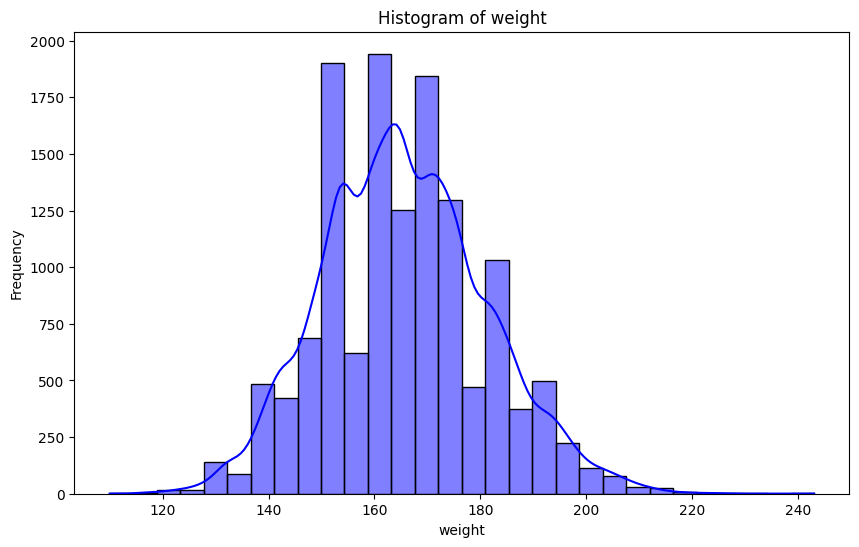

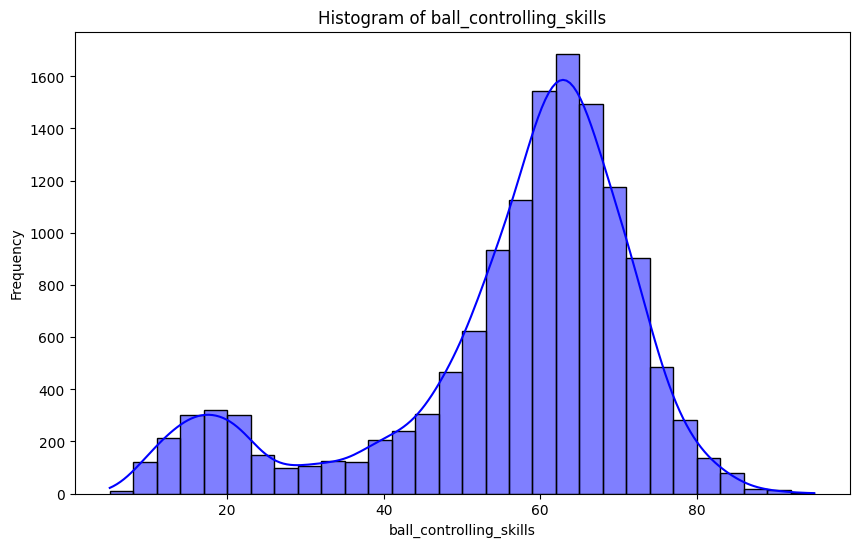

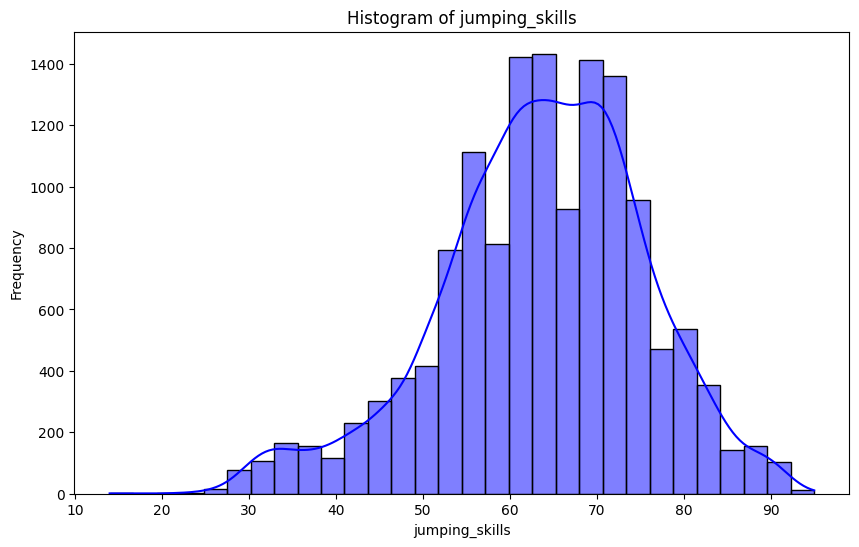

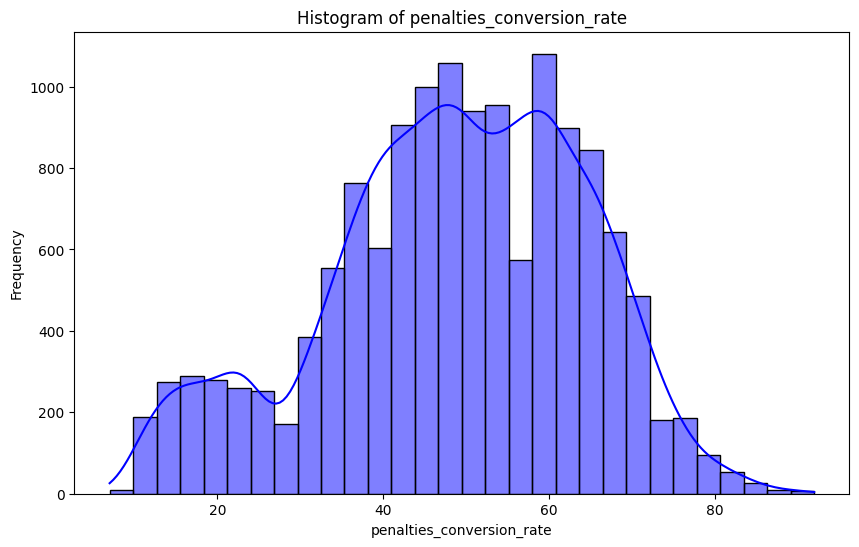

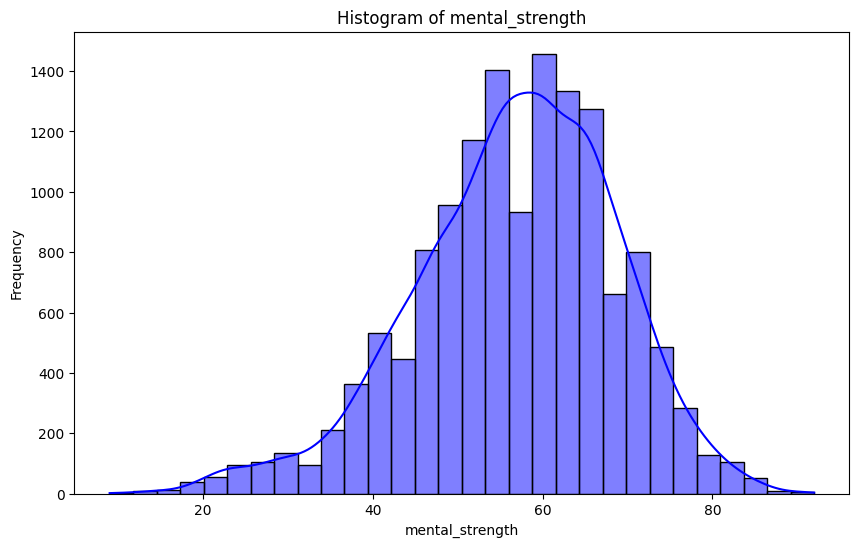

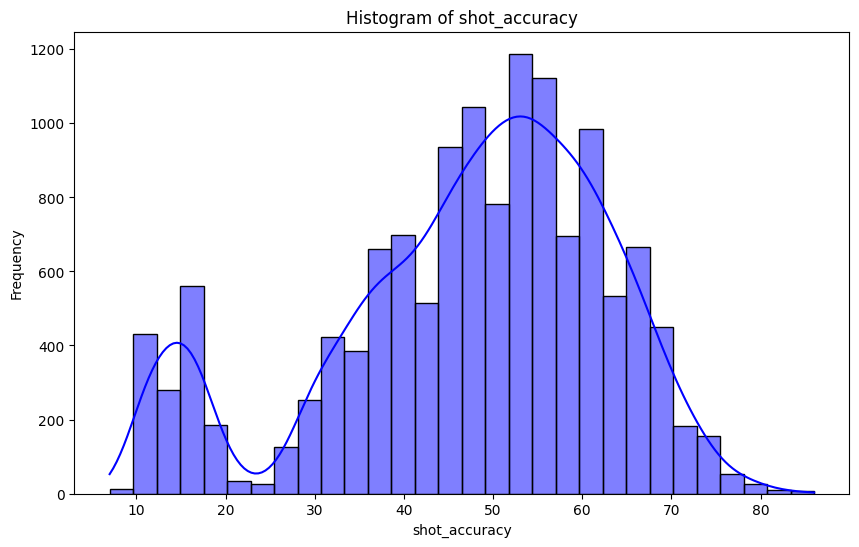

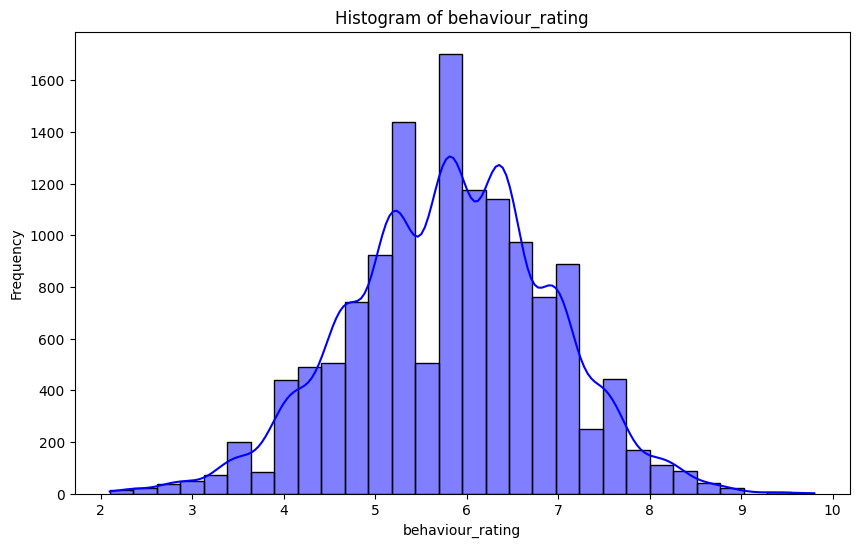

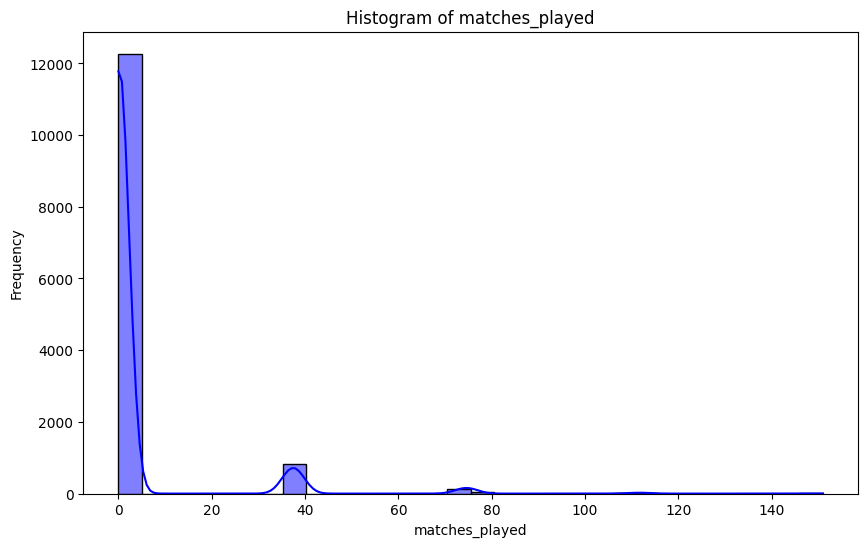

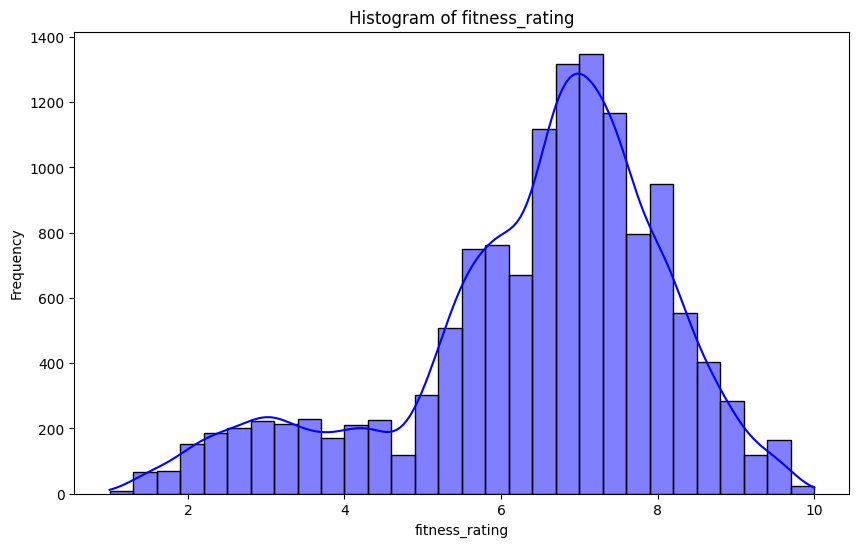

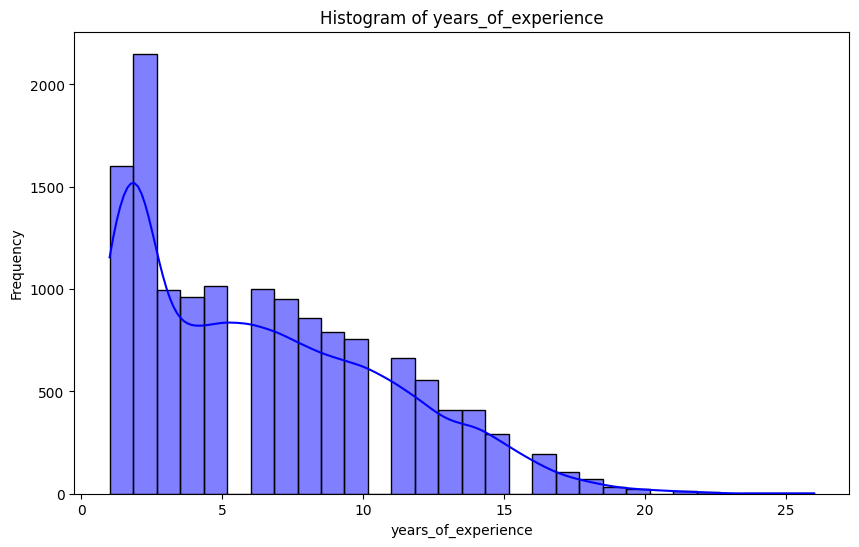

In [58]:
# Plot histograms for each column with missing values
for col in missing_val_col_num:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col],kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

Preprocessing

Missing values

In [59]:
# Fill missing values in these columns with the median of each column
for col in missing_val_col_num:
    data[col].fillna(data[col].median(), inplace=True)


In [60]:
data.isna().sum()

player_id                       0
name                            0
age                             0
gender                         19
country                         0
height                          0
weight                          0
ball_controlling_skills         0
body_reflexes                   0
body_balance                    0
jumping_skills                  0
penalties_conversion_rate       0
mental_strength                 0
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                   0
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating                0
matches_played                  0
fitness_rating                  0
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience             0
no_of_disqualifications         0
selection     

In [61]:
missing_val_col_obj = data[missing_val_col].select_dtypes(include='object').columns
missing_val_col_obj

Index(['gender', 'strong_foot', 'coaching'], dtype='object')

In [62]:
# Fill missing values in these columns with the mode of each column
for col in missing_val_col_obj:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [63]:
data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

Outliers

In [64]:
# Identify numeric columns
num_cols = data.select_dtypes(include=np.number).columns
num_cols

Index(['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes',
       'body_balance', 'jumping_skills', 'penalties_conversion_rate',
       'mental_strength', 'goalkeeping_skills', 'defending_skills',
       'passing_skills', 'dribbling_skills', 'shot_accuracy',
       'body_strength_stamina', 'max_running_speed', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won',
       'years_of_experience', 'no_of_disqualifications', 'selection'],
      dtype='object')

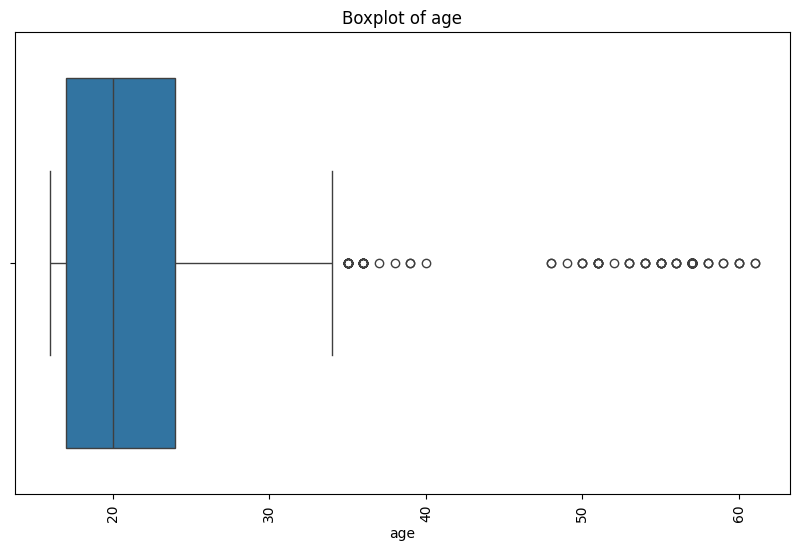

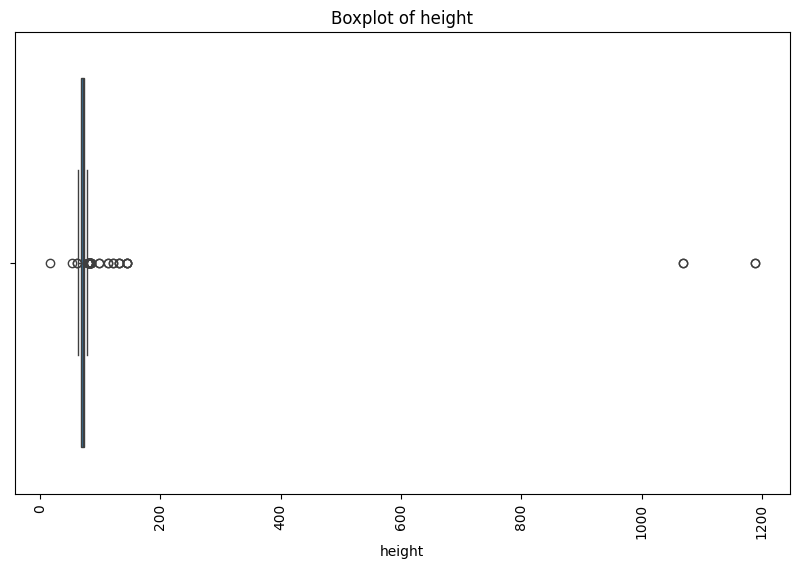

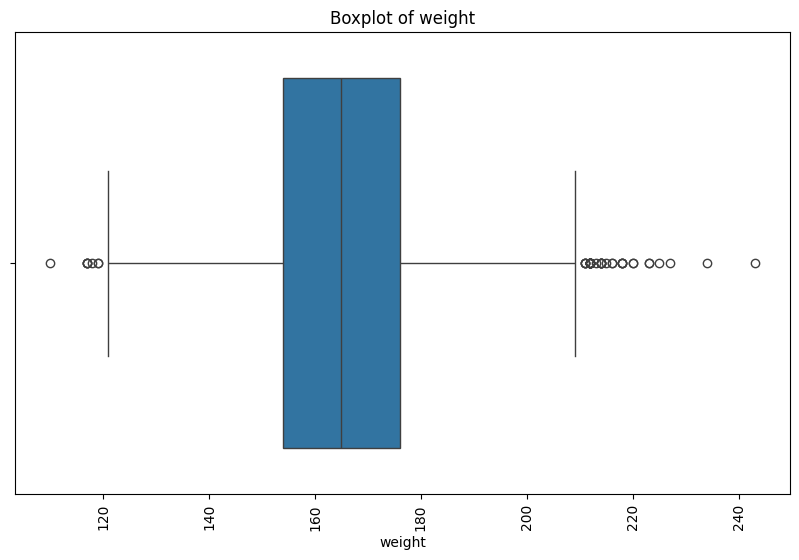

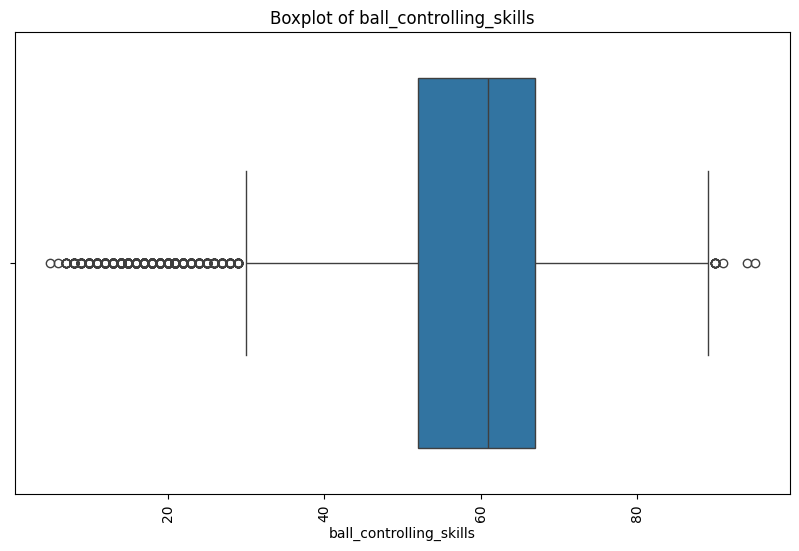

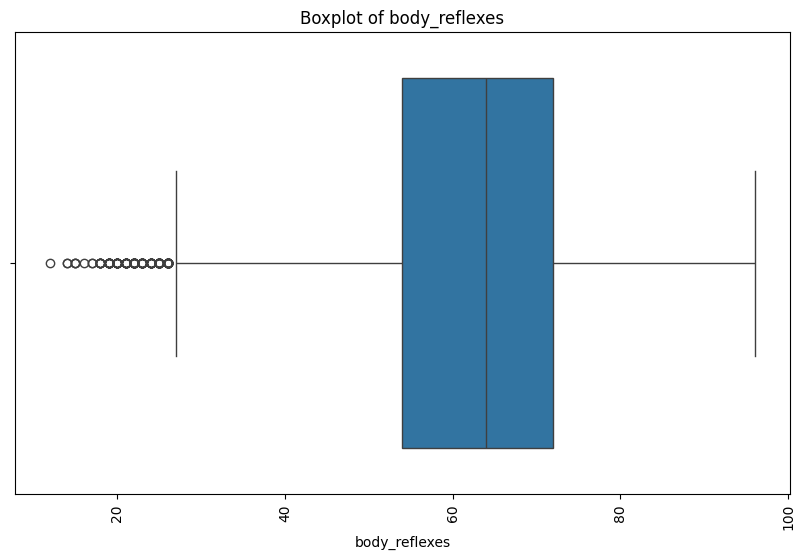

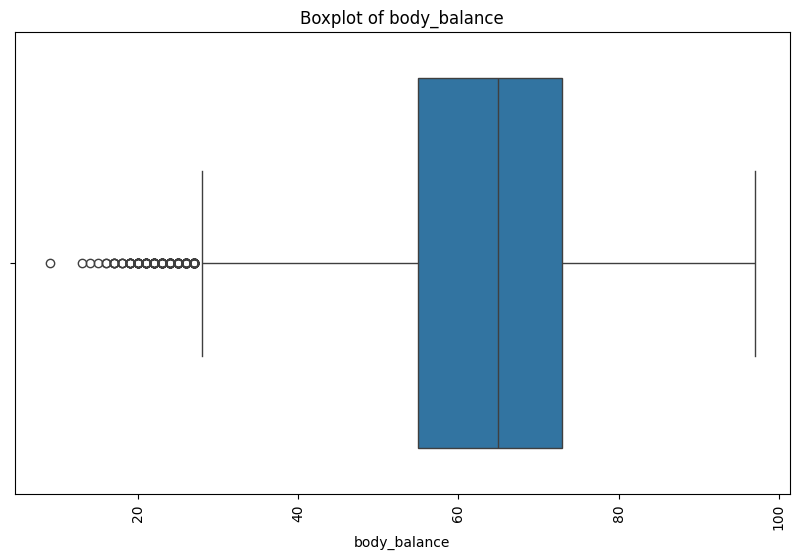

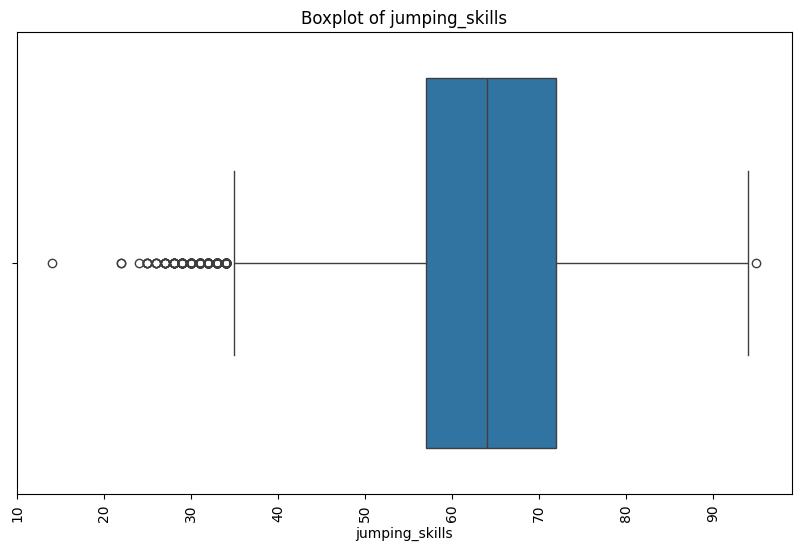

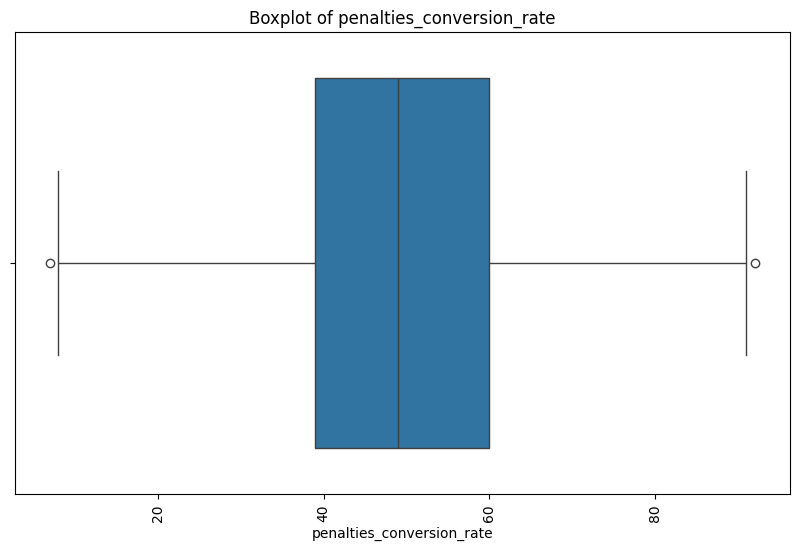

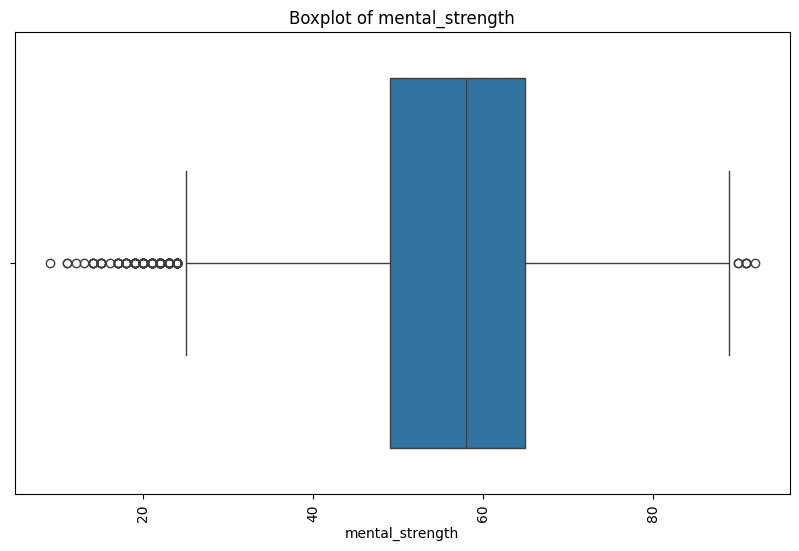

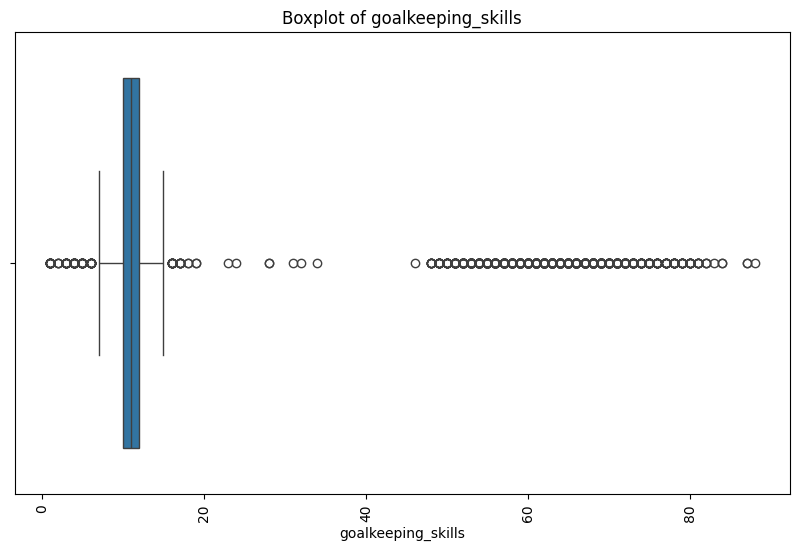

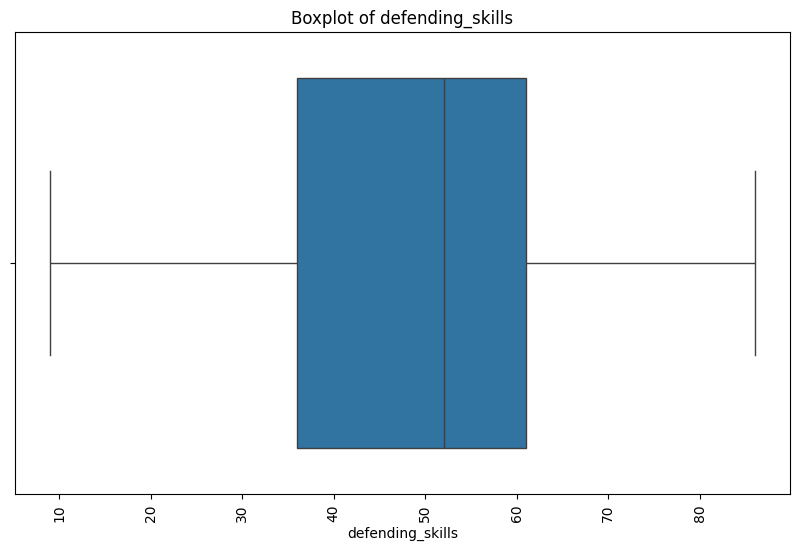

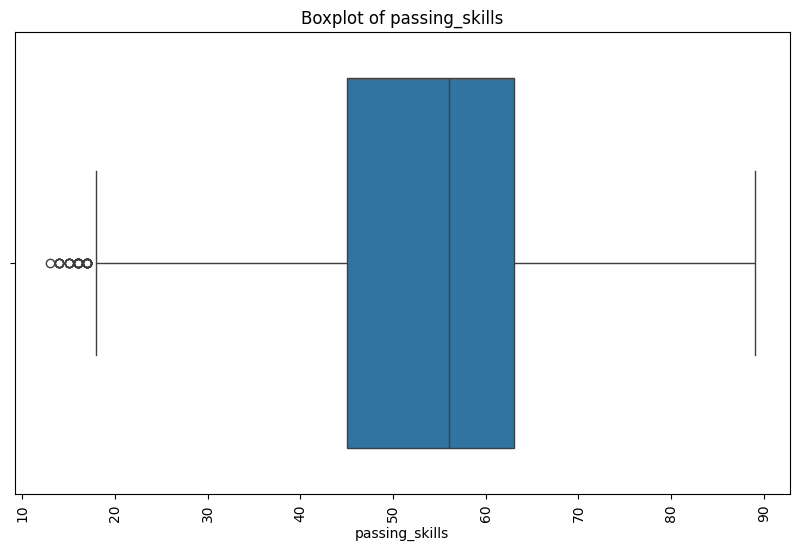

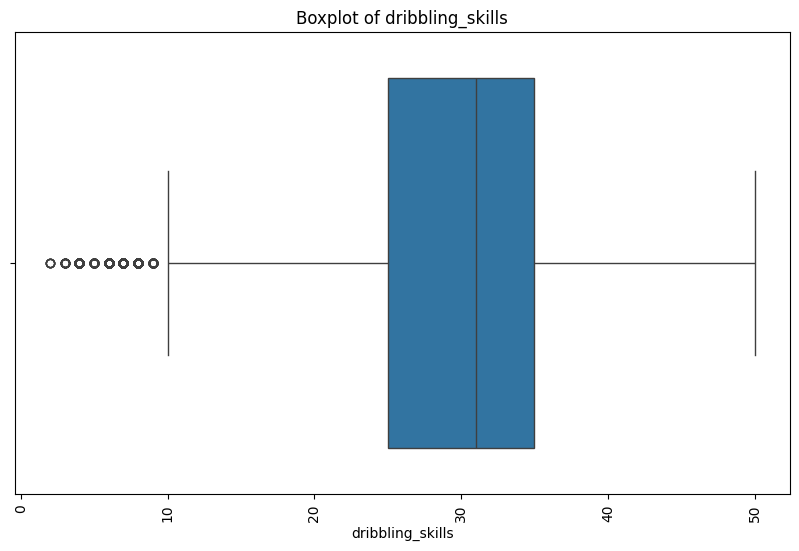

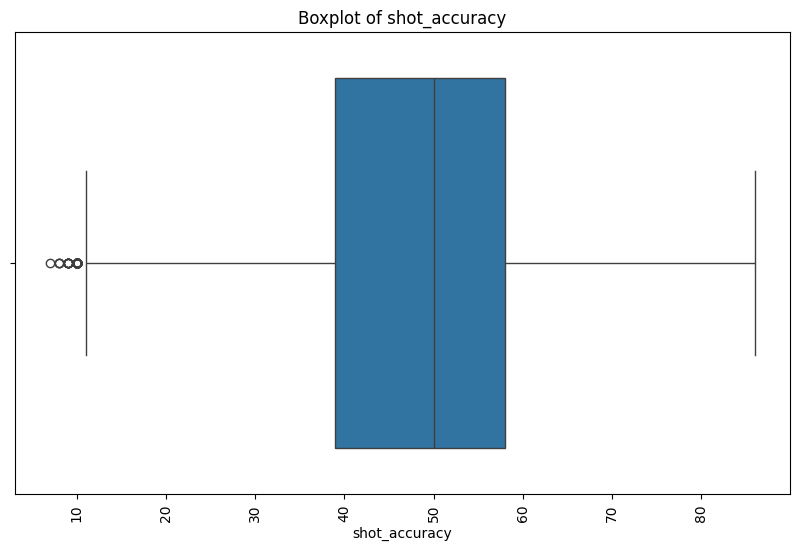

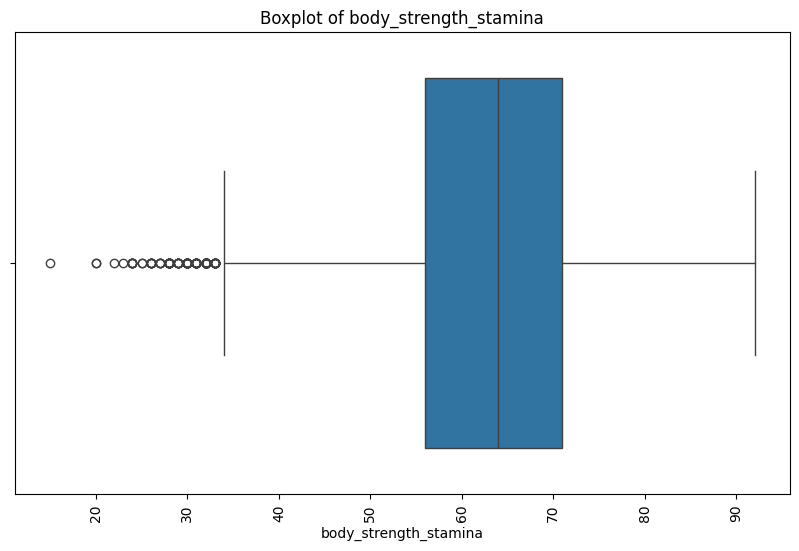

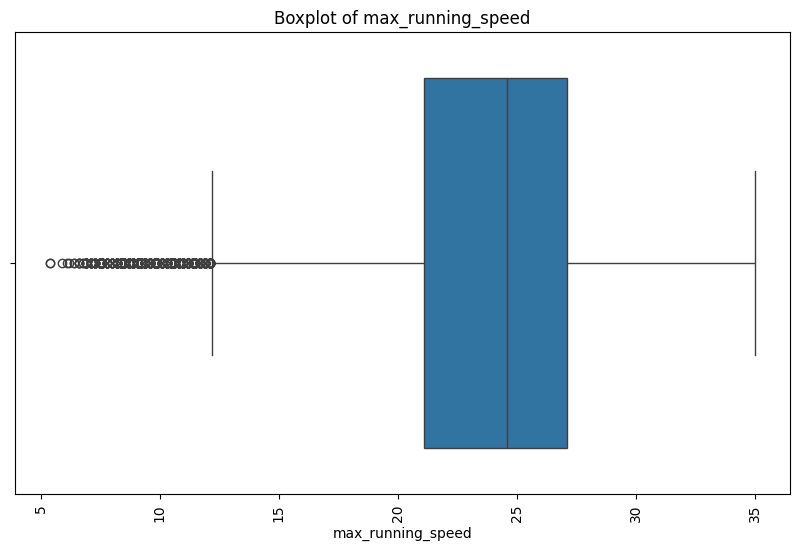

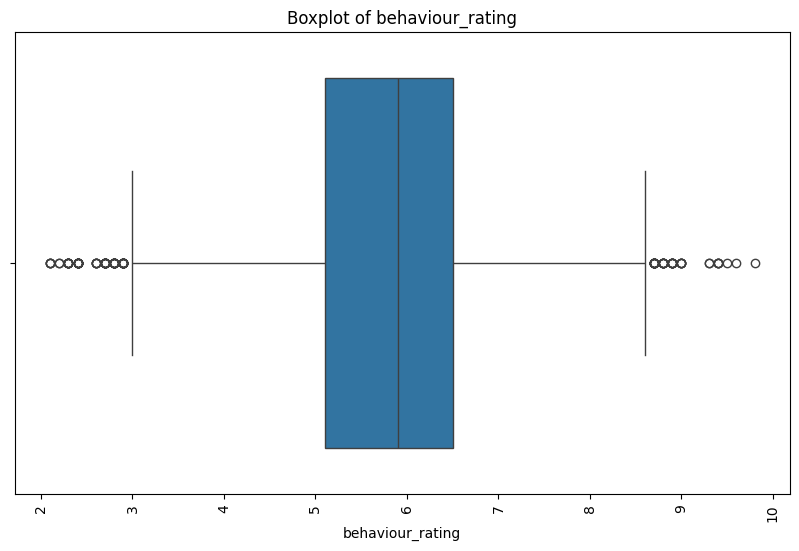

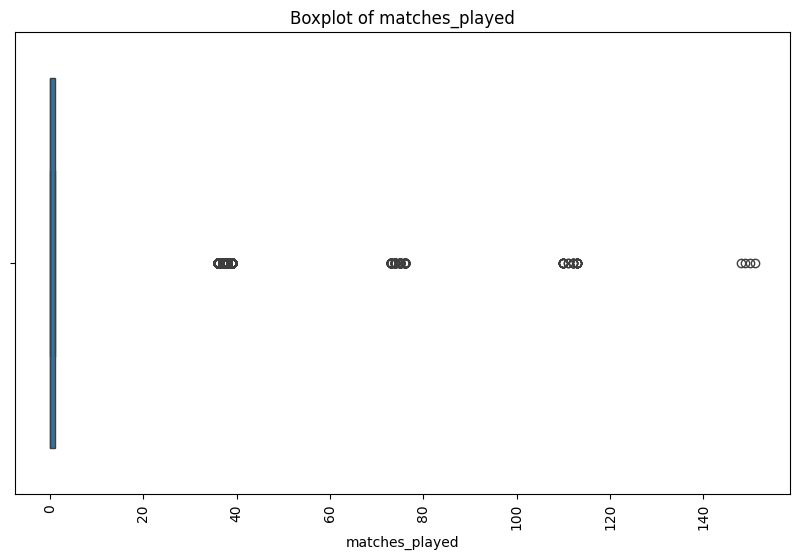

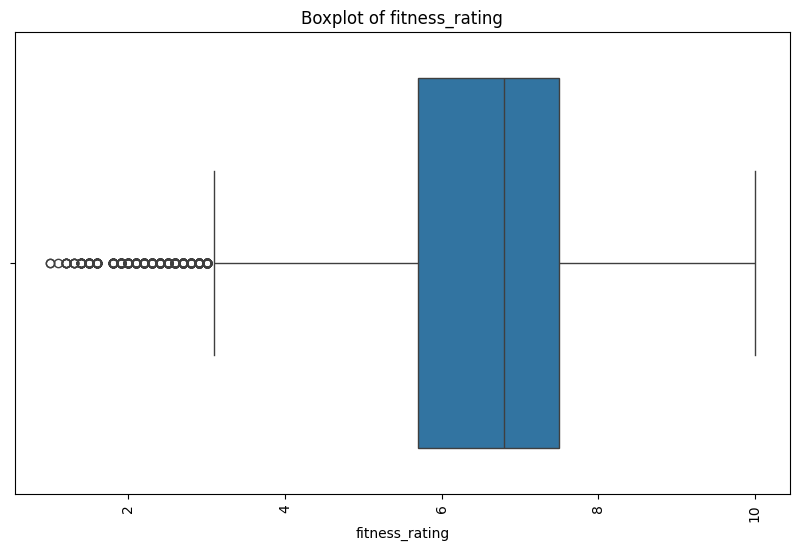

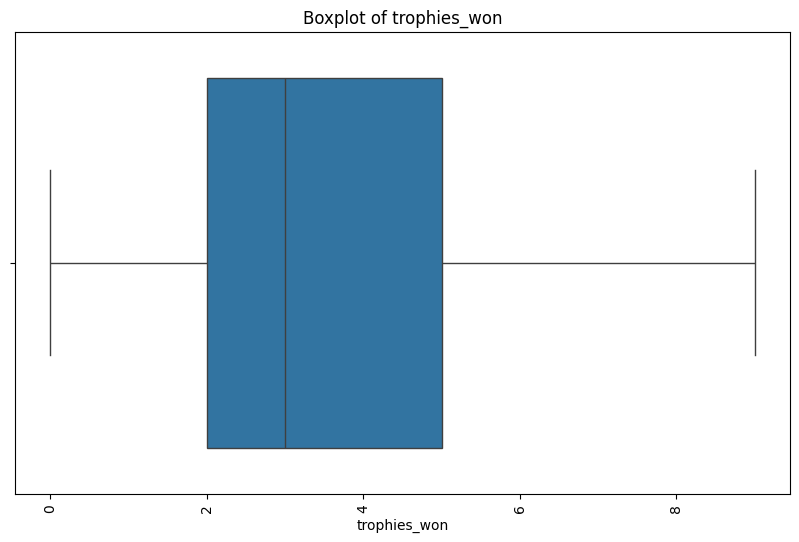

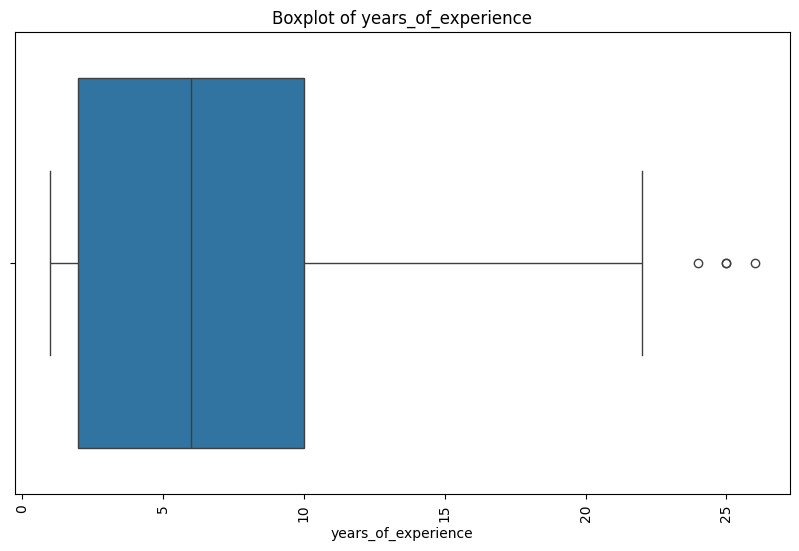

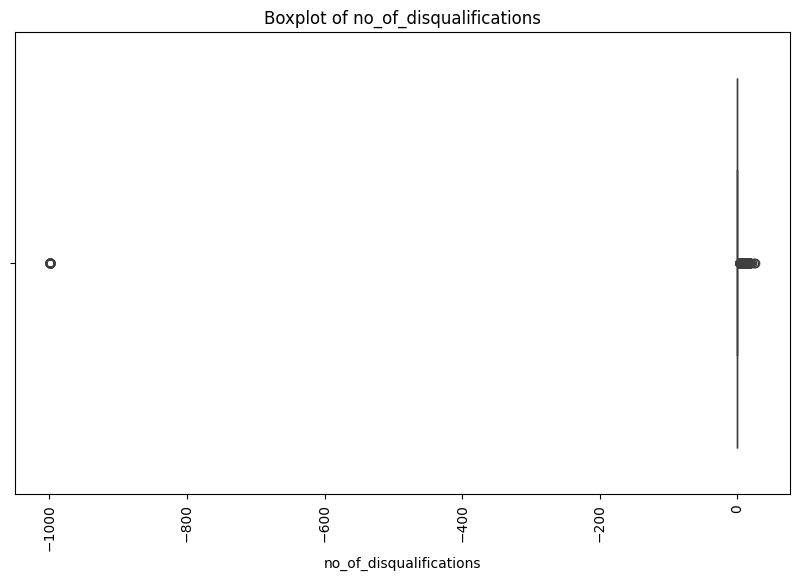

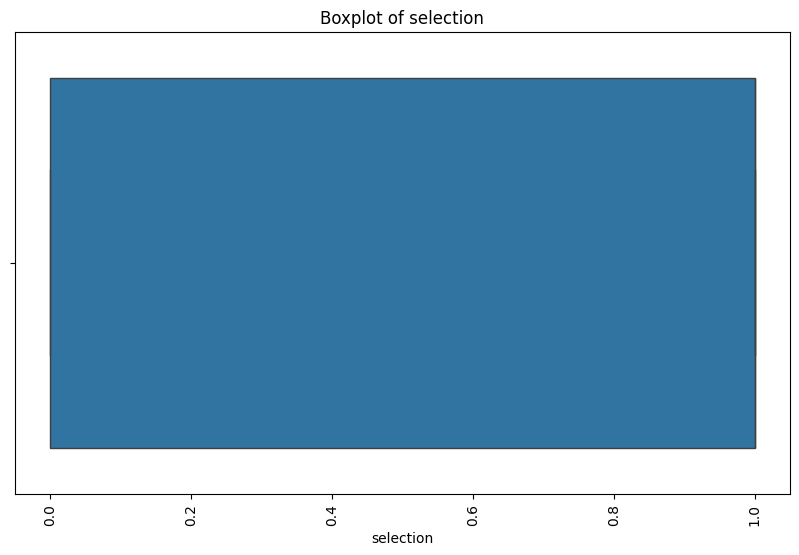

In [65]:
# Loop through each numeric column and create a boxplot
for col in num_cols:
    plt.figure(figsize=(10, 6))  # Set the size of each individual plot
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [66]:
features=['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes',
       'body_balance', 'jumping_skills', 'penalties_conversion_rate',
       'mental_strength', 'goalkeeping_skills',
       'passing_skills', 'dribbling_skills', 'shot_accuracy',
       'body_strength_stamina', 'max_running_speed', 'behaviour_rating',
       'matches_played', 'fitness_rating',
       'years_of_experience', 'no_of_disqualifications']

Feature: age
  Q1: 17.0
  Q3: 24.0
  IQR: 7.0
  Lower limit: 6.5
  Upper limit: 34.5
  Outliers: [51, 36, 36, 52, 57, 54, 57, 57, 57, 35, 54, 50, 36, 36, 57, 39, 49, 36, 55, 57, 53, 35, 57, 35, 55, 57, 57, 36, 54, 48, 35, 36, 36, 59, 53, 60, 55, 48, 36, 57, 35, 36, 37, 57, 57, 59, 36, 35, 35, 54, 57, 57, 36, 57, 57, 35, 57, 57, 58, 51, 57, 57, 35, 61, 55, 60, 39, 51, 57, 51, 57, 57, 57, 38, 55, 56, 57, 57, 60, 57, 57, 51, 50, 56, 57, 36, 58, 50, 57, 57, 35, 57, 57, 57, 57, 61, 53, 57, 35, 35, 57, 57, 36, 57, 58, 35, 57, 57, 57, 57, 35, 35, 55, 56, 40, 57, 35, 56, 51]


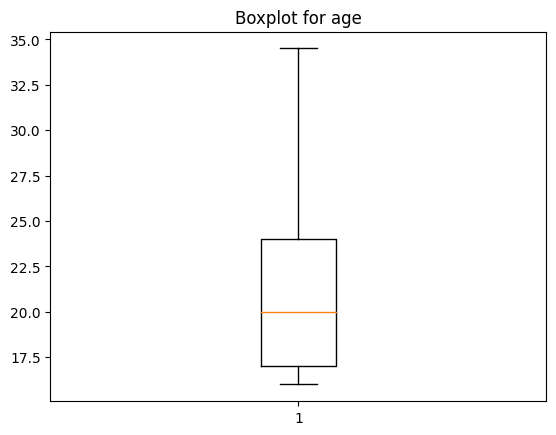

Feature: height
  Q1: 69.0
  Q3: 73.0
  IQR: 4.0
  Lower limit: 63.0
  Upper limit: 79.0
  Outliers: [85, 145, 83, 80, 83, 17, 113, 83, 145, 81, 132, 83, 145, 85, 80, 122, 122, 62, 1188, 113, 1069, 132, 132, 83, 99, 80, 53, 83, 99, 80, 80, 62, 1188, 83, 80, 85, 145, 80, 1069, 81]


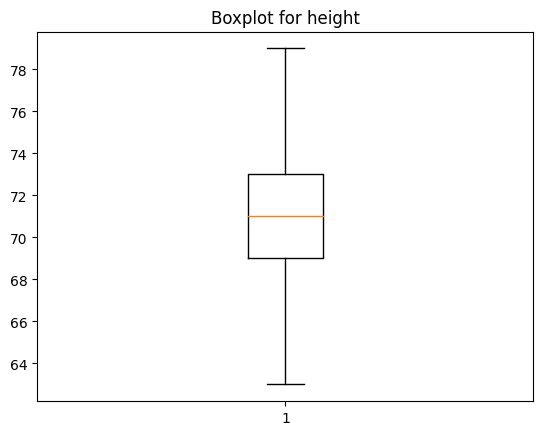

Feature: weight
  Q1: 154.0
  Q3: 176.0
  IQR: 22.0
  Lower limit: 121.0
  Upper limit: 209.0
  Outliers: [212.0, 212.0, 211.0, 212.0, 212.0, 216.0, 214.0, 214.0, 117.0, 214.0, 212.0, 212.0, 225.0, 212.0, 220.0, 214.0, 214.0, 212.0, 110.0, 223.0, 211.0, 212.0, 212.0, 211.0, 218.0, 117.0, 216.0, 218.0, 118.0, 214.0, 119.0, 218.0, 119.0, 211.0, 212.0, 117.0, 117.0, 220.0, 227.0, 212.0, 212.0, 243.0, 234.0, 218.0, 213.0, 212.0, 215.0, 223.0]


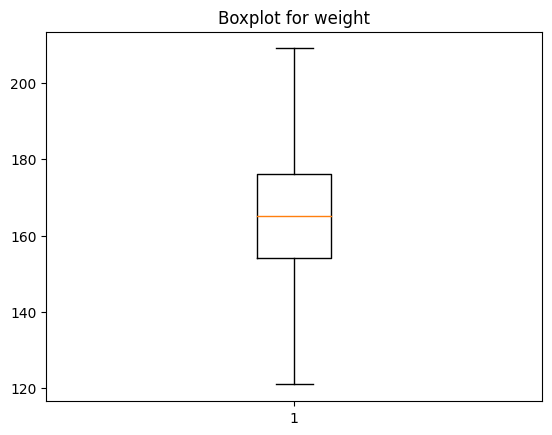

Feature: ball_controlling_skills
  Q1: 52.0
  Q3: 67.0
  IQR: 15.0
  Lower limit: 29.5
  Upper limit: 89.5
  Outliers: [16.0, 29.0, 17.0, 19.0, 20.0, 18.0, 25.0, 17.0, 9.0, 17.0, 22.0, 10.0, 24.0, 29.0, 17.0, 20.0, 21.0, 15.0, 21.0, 13.0, 20.0, 29.0, 18.0, 25.0, 13.0, 16.0, 11.0, 10.0, 13.0, 10.0, 10.0, 20.0, 25.0, 22.0, 23.0, 10.0, 19.0, 11.0, 18.0, 12.0, 10.0, 9.0, 12.0, 11.0, 13.0, 8.0, 17.0, 29.0, 14.0, 21.0, 20.0, 8.0, 15.0, 29.0, 18.0, 20.0, 21.0, 15.0, 27.0, 22.0, 22.0, 19.0, 14.0, 25.0, 16.0, 10.0, 20.0, 14.0, 11.0, 15.0, 17.0, 28.0, 24.0, 10.0, 22.0, 21.0, 9.0, 16.0, 18.0, 14.0, 20.0, 18.0, 12.0, 21.0, 20.0, 18.0, 17.0, 25.0, 91.0, 18.0, 17.0, 16.0, 16.0, 18.0, 22.0, 22.0, 17.0, 23.0, 16.0, 13.0, 16.0, 22.0, 15.0, 20.0, 10.0, 22.0, 19.0, 20.0, 14.0, 17.0, 17.0, 10.0, 16.0, 19.0, 28.0, 17.0, 17.0, 20.0, 15.0, 11.0, 17.0, 20.0, 13.0, 22.0, 13.0, 21.0, 17.0, 25.0, 20.0, 16.0, 12.0, 15.0, 15.0, 12.0, 90.0, 14.0, 8.0, 13.0, 12.0, 19.0, 11.0, 15.0, 17.0, 13.0, 16.0, 23.0, 29.0, 15.0

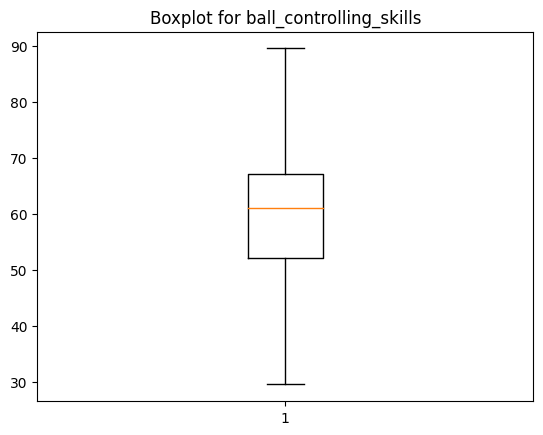

Feature: body_reflexes
  Q1: 54.0
  Q3: 72.0
  IQR: 18.0
  Lower limit: 27.0
  Upper limit: 99.0
  Outliers: [25.0, 26.0, 21.0, 22.0, 25.0, 22.0, 25.0, 24.0, 20.0, 22.0, 19.0, 20.0, 15.0, 18.0, 21.0, 25.0, 26.0, 21.0, 23.0, 19.0, 23.0, 22.0, 21.0, 20.0, 18.0, 23.0, 21.0, 20.0, 20.0, 25.0, 20.0, 26.0, 23.0, 24.0, 26.0, 20.0, 24.0, 19.0, 26.0, 24.0, 26.0, 19.0, 26.0, 24.0, 26.0, 20.0, 23.0, 26.0, 20.0, 25.0, 18.0, 25.0, 19.0, 22.0, 22.0, 26.0, 25.0, 21.0, 22.0, 19.0, 23.0, 21.0, 23.0, 25.0, 21.0, 26.0, 25.0, 21.0, 12.0, 26.0, 22.0, 26.0, 24.0, 25.0, 18.0, 23.0, 22.0, 25.0, 25.0, 22.0, 24.0, 23.0, 24.0, 21.0, 24.0, 22.0, 22.0, 23.0, 14.0, 25.0, 22.0, 23.0, 22.0, 22.0, 20.0, 24.0, 25.0, 25.0, 21.0, 20.0, 19.0, 19.0, 23.0, 26.0, 16.0, 25.0, 26.0, 22.0, 21.0, 20.0, 14.0, 25.0, 18.0, 21.0, 26.0, 23.0, 23.0, 22.0, 25.0, 19.0, 25.0, 22.0, 23.0, 23.0, 26.0, 15.0, 23.0, 23.0, 22.0, 22.0, 26.0, 26.0, 26.0, 24.0, 19.0, 18.0, 25.0, 23.0, 25.0, 26.0, 26.0, 21.0, 24.0, 26.0, 22.0, 25.0, 26.0, 22.0, 19

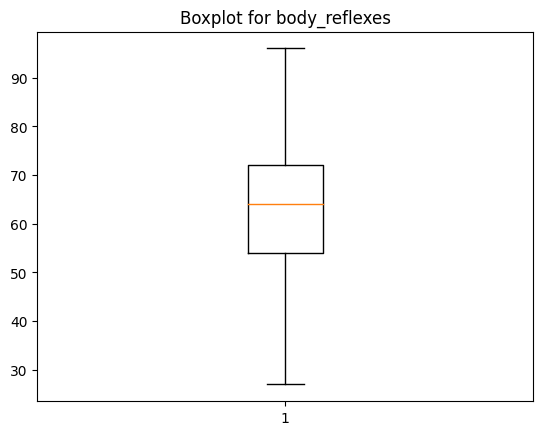

Feature: body_balance
  Q1: 55.0
  Q3: 73.0
  IQR: 18.0
  Lower limit: 28.0
  Upper limit: 100.0
  Outliers: [24.0, 22.0, 25.0, 22.0, 23.0, 24.0, 22.0, 21.0, 26.0, 25.0, 18.0, 26.0, 22.0, 24.0, 22.0, 24.0, 19.0, 13.0, 20.0, 27.0, 21.0, 23.0, 24.0, 26.0, 26.0, 27.0, 14.0, 24.0, 25.0, 23.0, 23.0, 21.0, 23.0, 24.0, 25.0, 23.0, 21.0, 24.0, 20.0, 27.0, 27.0, 24.0, 26.0, 22.0, 24.0, 26.0, 22.0, 22.0, 20.0, 24.0, 27.0, 26.0, 22.0, 23.0, 25.0, 22.0, 22.0, 27.0, 21.0, 26.0, 26.0, 26.0, 24.0, 25.0, 26.0, 17.0, 26.0, 23.0, 26.0, 20.0, 23.0, 20.0, 25.0, 26.0, 25.0, 25.0, 25.0, 23.0, 23.0, 27.0, 25.0, 21.0, 26.0, 24.0, 26.0, 24.0, 27.0, 26.0, 19.0, 22.0, 27.0, 21.0, 20.0, 19.0, 25.0, 24.0, 15.0, 23.0, 25.0, 18.0, 25.0, 23.0, 27.0, 23.0, 26.0, 24.0, 26.0, 20.0, 21.0, 24.0, 25.0, 25.0, 19.0, 27.0, 27.0, 27.0, 23.0, 27.0, 26.0, 25.0, 20.0, 24.0, 26.0, 21.0, 18.0, 23.0, 27.0, 25.0, 26.0, 25.0, 26.0, 19.0, 25.0, 23.0, 17.0, 22.0, 20.0, 22.0, 26.0, 20.0, 20.0, 24.0, 27.0, 23.0, 24.0, 25.0, 27.0, 20.0, 24

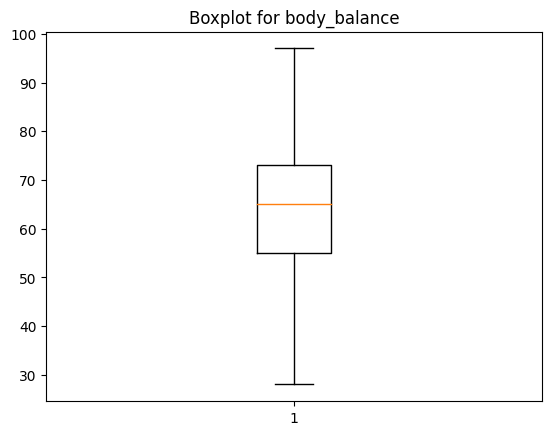

Feature: jumping_skills
  Q1: 57.0
  Q3: 72.0
  IQR: 15.0
  Lower limit: 34.5
  Upper limit: 94.5
  Outliers: [32.0, 30.0, 33.0, 34.0, 30.0, 29.0, 30.0, 29.0, 30.0, 34.0, 30.0, 31.0, 31.0, 28.0, 32.0, 34.0, 34.0, 31.0, 30.0, 32.0, 32.0, 32.0, 33.0, 30.0, 34.0, 29.0, 30.0, 32.0, 34.0, 34.0, 32.0, 31.0, 30.0, 33.0, 32.0, 30.0, 34.0, 33.0, 30.0, 31.0, 34.0, 33.0, 31.0, 32.0, 34.0, 29.0, 29.0, 31.0, 32.0, 28.0, 32.0, 32.0, 30.0, 33.0, 32.0, 34.0, 33.0, 33.0, 31.0, 33.0, 32.0, 31.0, 30.0, 32.0, 31.0, 30.0, 33.0, 32.0, 29.0, 28.0, 29.0, 26.0, 32.0, 32.0, 34.0, 33.0, 30.0, 31.0, 32.0, 28.0, 29.0, 29.0, 32.0, 33.0, 33.0, 30.0, 31.0, 33.0, 30.0, 27.0, 28.0, 32.0, 33.0, 33.0, 31.0, 33.0, 33.0, 32.0, 34.0, 30.0, 30.0, 31.0, 34.0, 31.0, 31.0, 27.0, 34.0, 31.0, 24.0, 33.0, 32.0, 32.0, 32.0, 34.0, 32.0, 31.0, 32.0, 31.0, 32.0, 31.0, 34.0, 29.0, 33.0, 29.0, 33.0, 31.0, 31.0, 34.0, 29.0, 32.0, 31.0, 31.0, 31.0, 22.0, 31.0, 27.0, 29.0, 30.0, 33.0, 32.0, 34.0, 34.0, 30.0, 32.0, 33.0, 28.0, 26.0, 33.0, 3

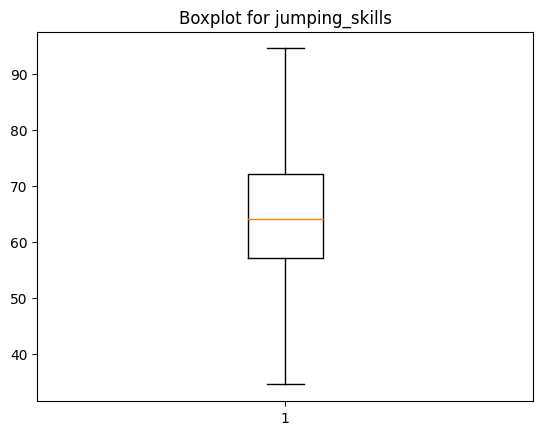

Feature: penalties_conversion_rate
  Q1: 39.0
  Q3: 60.0
  IQR: 21.0
  Lower limit: 7.5
  Upper limit: 91.5
  Outliers: [7.0, 92.0]


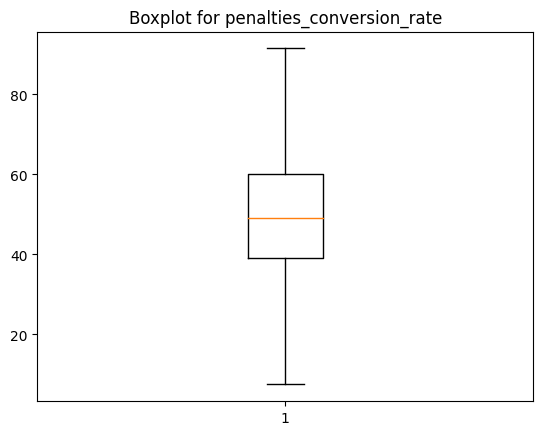

Feature: mental_strength
  Q1: 49.0
  Q3: 65.0
  IQR: 16.0
  Lower limit: 25.0
  Upper limit: 89.0
  Outliers: [24.0, 23.0, 17.0, 24.0, 22.0, 20.0, 23.0, 24.0, 20.0, 21.0, 13.0, 19.0, 90.0, 24.0, 24.0, 91.0, 22.0, 22.0, 21.0, 12.0, 23.0, 24.0, 21.0, 23.0, 24.0, 22.0, 22.0, 19.0, 20.0, 22.0, 18.0, 19.0, 24.0, 21.0, 24.0, 15.0, 18.0, 21.0, 23.0, 24.0, 21.0, 15.0, 22.0, 24.0, 24.0, 21.0, 91.0, 19.0, 21.0, 18.0, 19.0, 22.0, 21.0, 14.0, 21.0, 22.0, 21.0, 20.0, 22.0, 21.0, 23.0, 24.0, 17.0, 23.0, 24.0, 14.0, 20.0, 23.0, 19.0, 24.0, 21.0, 14.0, 23.0, 20.0, 14.0, 20.0, 19.0, 23.0, 24.0, 14.0, 17.0, 22.0, 18.0, 22.0, 24.0, 20.0, 22.0, 24.0, 20.0, 20.0, 19.0, 19.0, 24.0, 22.0, 24.0, 18.0, 17.0, 92.0, 24.0, 22.0, 20.0, 22.0, 9.0, 20.0, 22.0, 11.0, 22.0, 23.0, 23.0, 18.0, 23.0, 22.0, 15.0, 24.0, 22.0, 23.0, 20.0, 23.0, 22.0, 19.0, 24.0, 24.0, 23.0, 23.0, 23.0, 22.0, 91.0, 24.0, 19.0, 24.0, 20.0, 15.0, 21.0, 24.0, 90.0, 16.0, 17.0, 21.0, 22.0, 23.0, 23.0, 24.0, 22.0, 15.0, 24.0, 23.0, 22.0, 23.0, 2

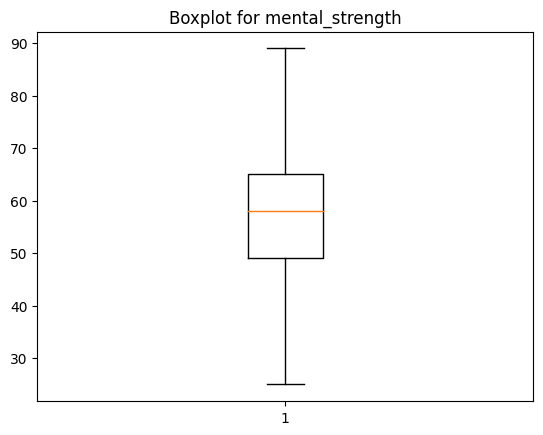

Feature: goalkeeping_skills
  Q1: 10.0
  Q3: 12.0
  IQR: 2.0
  Lower limit: 7.0
  Upper limit: 15.0
  Outliers: [3.0, 80.0, 50.0, 58.0, 52.0, 68.0, 3.0, 78.0, 56.0, 55.0, 54.0, 76.0, 57.0, 69.0, 48.0, 67.0, 68.0, 61.0, 57.0, 67.0, 57.0, 57.0, 16.0, 59.0, 4.0, 5.0, 70.0, 57.0, 69.0, 55.0, 62.0, 51.0, 63.0, 59.0, 60.0, 52.0, 69.0, 59.0, 71.0, 57.0, 3.0, 71.0, 57.0, 67.0, 71.0, 51.0, 58.0, 53.0, 55.0, 61.0, 64.0, 70.0, 68.0, 68.0, 5.0, 61.0, 53.0, 69.0, 79.0, 60.0, 69.0, 67.0, 49.0, 81.0, 74.0, 67.0, 61.0, 62.0, 59.0, 50.0, 16.0, 48.0, 66.0, 54.0, 66.0, 58.0, 59.0, 62.0, 72.0, 76.0, 68.0, 57.0, 4.0, 69.0, 54.0, 77.0, 48.0, 58.0, 73.0, 5.0, 66.0, 5.0, 68.0, 64.0, 56.0, 68.0, 72.0, 57.0, 54.0, 73.0, 69.0, 72.0, 71.0, 68.0, 55.0, 16.0, 52.0, 87.0, 68.0, 54.0, 65.0, 69.0, 74.0, 80.0, 72.0, 63.0, 65.0, 62.0, 56.0, 61.0, 70.0, 70.0, 54.0, 59.0, 54.0, 56.0, 52.0, 57.0, 68.0, 71.0, 62.0, 68.0, 50.0, 70.0, 64.0, 63.0, 58.0, 62.0, 59.0, 56.0, 64.0, 61.0, 69.0, 63.0, 4.0, 66.0, 66.0, 68.0, 81.0, 56.

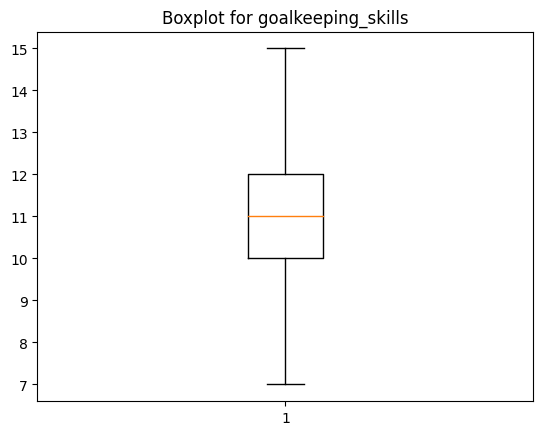

Feature: passing_skills
  Q1: 45.0
  Q3: 63.0
  IQR: 18.0
  Lower limit: 18.0
  Upper limit: 90.0
  Outliers: [15.0, 17.0, 15.0, 17.0, 16.0, 17.0, 17.0, 16.0, 16.0, 17.0, 17.0, 15.0, 15.0, 15.0, 16.0, 14.0, 14.0, 14.0, 16.0, 17.0, 17.0, 16.0, 14.0, 13.0, 16.0, 14.0, 16.0, 16.0, 17.0, 16.0, 17.0, 17.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 16.0, 16.0, 17.0, 16.0]


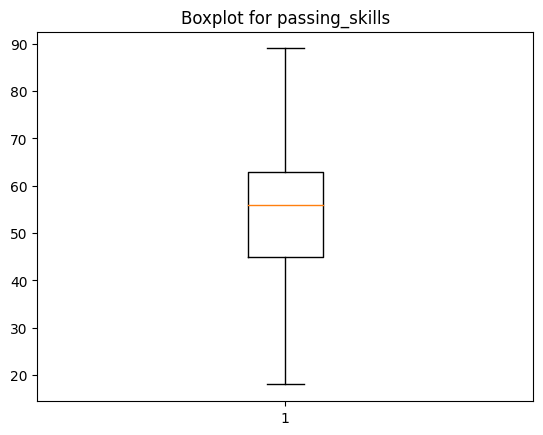

Feature: dribbling_skills
  Q1: 25.0
  Q3: 35.0
  IQR: 10.0
  Lower limit: 10.0
  Upper limit: 50.0
  Outliers: [8.0, 8.0, 8.0, 8.0, 4.0, 3.0, 6.0, 5.0, 8.0, 8.0, 8.0, 6.0, 6.0, 4.0, 7.0, 9.0, 8.0, 6.0, 9.0, 8.0, 6.0, 6.0, 4.0, 8.0, 4.0, 7.0, 7.0, 6.0, 8.0, 6.0, 9.0, 4.0, 8.0, 4.0, 6.0, 5.0, 2.0, 8.0, 6.0, 6.0, 6.0, 8.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 7.0, 7.0, 5.0, 5.0, 8.0, 8.0, 6.0, 8.0, 8.0, 6.0, 6.0, 8.0, 8.0, 8.0, 6.0, 5.0, 6.0, 4.0, 8.0, 7.0, 8.0, 6.0, 5.0, 9.0, 6.0, 8.0, 6.0, 8.0, 8.0, 3.0, 7.0, 8.0, 8.0, 6.0, 6.0, 4.0, 5.0, 6.0, 4.0, 8.0, 6.0, 7.0, 4.0, 5.0, 3.0, 9.0, 8.0, 8.0, 4.0, 6.0, 8.0, 6.0, 2.0, 8.0, 4.0, 6.0, 5.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 8.0, 4.0, 6.0, 8.0, 7.0, 8.0, 9.0, 6.0, 6.0, 8.0, 4.0, 7.0, 6.0, 6.0, 8.0, 4.0, 8.0, 6.0, 6.0, 8.0, 8.0, 3.0, 8.0, 7.0, 6.0, 8.0, 7.0, 3.0, 6.0, 6.0, 4.0, 3.0, 8.0, 8.0, 8.0, 8.0, 3.0, 6.0, 6.0, 7.0, 5.0, 6.0, 4.0, 8.0, 4.0, 7.0, 8.0, 8.0, 8.0, 9.0, 9.0, 8.0, 8.0, 6.0, 6.0, 3.0, 8.0, 7.0, 7.0, 9.0, 8.0, 4.0, 7.0, 6.

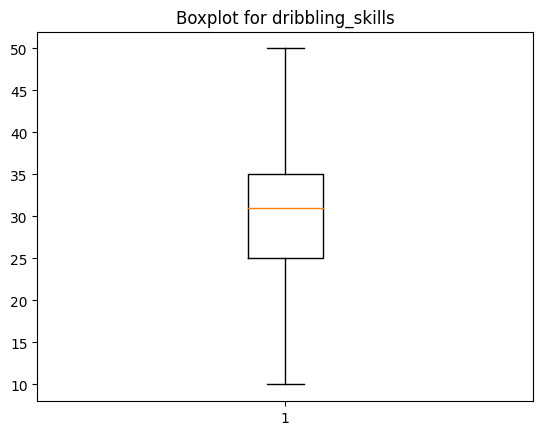

Feature: shot_accuracy
  Q1: 39.0
  Q3: 58.0
  IQR: 19.0
  Lower limit: 10.5
  Upper limit: 86.5
  Outliers: [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 8.0, 10.0, 10.0, 10.0, 7.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 8.0, 10.0, 10.0, 8.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0]


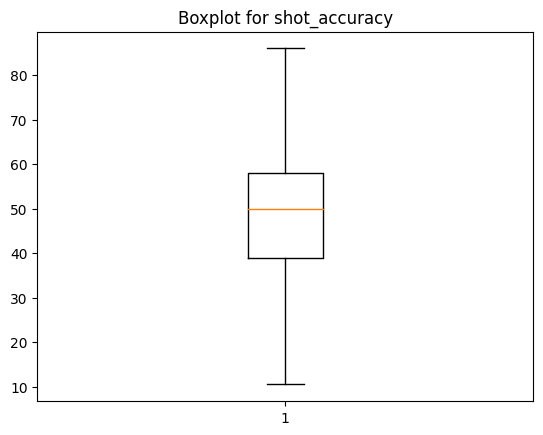

Feature: body_strength_stamina
  Q1: 56.0
  Q3: 71.0
  IQR: 15.0
  Lower limit: 33.5
  Upper limit: 93.5
  Outliers: [28.0, 30.0, 26.0, 30.0, 30.0, 32.0, 33.0, 32.0, 28.0, 33.0, 33.0, 33.0, 33.0, 30.0, 32.0, 23.0, 28.0, 32.0, 32.0, 30.0, 32.0, 31.0, 32.0, 29.0, 32.0, 32.0, 32.0, 32.0, 24.0, 26.0, 26.0, 32.0, 33.0, 30.0, 28.0, 30.0, 32.0, 31.0, 32.0, 31.0, 30.0, 28.0, 29.0, 26.0, 33.0, 30.0, 31.0, 32.0, 28.0, 24.0, 30.0, 25.0, 32.0, 32.0, 31.0, 32.0, 31.0, 30.0, 33.0, 32.0, 33.0, 30.0, 28.0, 32.0, 29.0, 32.0, 32.0, 31.0, 32.0, 32.0, 28.0, 28.0, 32.0, 32.0, 27.0, 32.0, 20.0, 29.0, 32.0, 31.0, 33.0, 26.0, 32.0, 28.0, 31.0, 30.0, 28.0, 30.0, 30.0, 30.0, 30.0, 32.0, 24.0, 33.0, 33.0, 31.0, 33.0, 33.0, 30.0, 30.0, 28.0, 30.0, 32.0, 27.0, 28.0, 31.0, 28.0, 22.0, 15.0, 32.0, 20.0, 32.0, 24.0, 32.0, 28.0, 31.0, 32.0, 33.0, 32.0, 31.0, 33.0, 31.0, 32.0, 32.0, 30.0, 30.0, 29.0, 30.0, 26.0, 24.0, 32.0, 32.0, 32.0, 27.0, 32.0, 30.0, 30.0, 28.0, 28.0, 25.0, 28.0, 32.0, 26.0, 33.0, 32.0, 31.0, 30.0, 

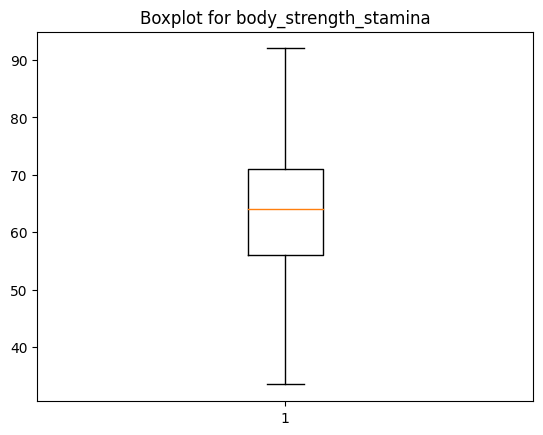

Feature: max_running_speed
  Q1: 21.1
  Q3: 27.1
  IQR: 6.0
  Lower limit: 12.100000000000001
  Upper limit: 36.1
  Outliers: [10.8, 6.6, 12.1, 11.2, 8.2, 12.1, 10.1, 10.6, 11.9, 7.3, 12.1, 7.6, 7.8, 8.7, 8.0, 7.6, 10.1, 9.6, 12.1, 10.1, 10.6, 8.0, 11.5, 9.9, 7.6, 8.7, 11.0, 10.3, 10.6, 9.9, 8.4, 9.1, 6.9, 6.9, 9.6, 10.8, 11.9, 6.9, 9.6, 11.2, 8.9, 7.1, 11.4, 10.6, 10.8, 8.9, 11.4, 12.1, 11.9, 11.9, 10.3, 8.5, 11.4, 10.3, 7.8, 8.4, 11.4, 11.7, 11.0, 11.5, 12.1, 8.5, 9.6, 8.9, 10.1, 10.5, 11.4, 11.4, 10.8, 8.5, 11.2, 10.1, 11.4, 9.4, 9.4, 11.0, 11.9, 10.1, 11.0, 8.9, 11.0, 10.5, 8.5, 9.8, 12.1, 8.4, 9.2, 9.9, 10.6, 8.4, 11.7, 9.2, 9.1, 10.5, 11.2, 9.2, 10.8, 8.2, 12.1, 8.2, 11.5, 10.5, 11.2, 9.1, 8.5, 11.2, 11.9, 9.8, 11.9, 9.2, 9.8, 7.5, 7.3, 9.8, 12.1, 11.2, 11.7, 11.0, 7.8, 11.2, 9.1, 11.7, 8.5, 9.2, 9.6, 10.1, 8.7, 9.9, 9.6, 11.2, 9.9, 9.9, 9.8, 11.7, 11.0, 7.5, 8.4, 10.5, 7.1, 11.0, 9.2, 11.7, 8.4, 10.6, 9.2, 9.4, 9.8, 11.5, 8.5, 7.6, 9.9, 9.9, 8.7, 9.4, 10.3, 10.3, 10.6, 11.0, 9.4

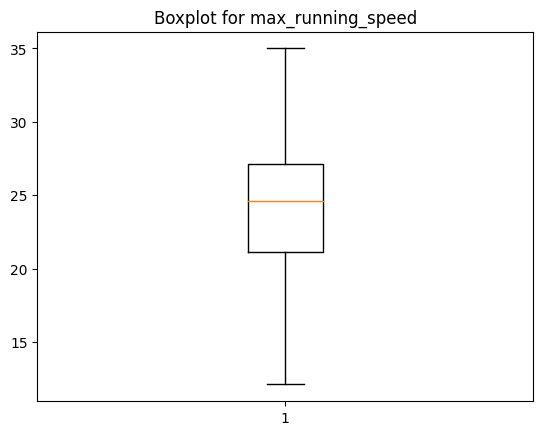

Feature: behaviour_rating
  Q1: 5.1
  Q3: 6.5
  IQR: 1.4000000000000004
  Lower limit: 2.999999999999999
  Upper limit: 8.600000000000001
  Outliers: [2.9, 2.3, 2.7, 2.8, 2.4, 8.7, 2.7, 2.9, 9.3, 2.9, 8.7, 2.8, 8.9, 2.3, 8.7, 8.7, 2.4, 8.7, 2.6, 2.8, 2.9, 8.7, 2.7, 2.9, 8.7, 8.9, 2.8, 8.7, 9.4, 9.4, 2.8, 2.7, 2.7, 2.7, 2.9, 2.9, 2.8, 2.3, 8.8, 2.3, 2.4, 8.7, 8.8, 2.9, 9.5, 8.7, 8.8, 2.4, 8.9, 2.6, 2.4, 2.1, 8.7, 9.4, 2.8, 2.4, 8.7, 2.8, 2.4, 2.3, 2.9, 2.9, 8.7, 9.0, 2.9, 8.7, 2.7, 8.7, 2.7, 2.7, 2.4, 2.7, 2.2, 2.7, 2.8, 2.7, 2.7, 9.4, 2.9, 9.0, 2.8, 2.8, 2.8, 8.9, 2.4, 8.7, 2.7, 2.9, 2.8, 2.9, 2.7, 2.8, 9.0, 2.4, 2.2, 8.8, 9.8, 9.0, 2.4, 2.9, 8.7, 2.4, 2.7, 2.6, 2.3, 8.8, 2.9, 8.8, 2.1, 2.4, 2.7, 2.8, 8.9, 8.9, 2.9, 2.8, 8.8, 2.9, 9.0, 2.9, 2.4, 8.7, 2.3, 2.1, 8.7, 2.3, 2.9, 2.9, 2.3, 2.4, 2.8, 9.3, 9.6, 8.8, 2.8, 2.7, 2.7, 8.9, 8.9, 2.1, 2.6, 2.6]


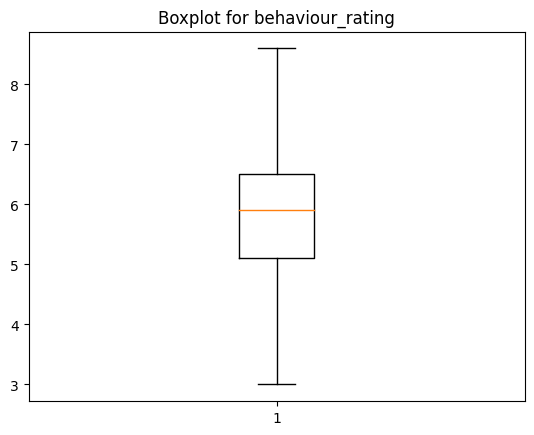

Feature: matches_played
  Q1: 0.0
  Q3: 1.0
  IQR: 1.0
  Lower limit: -1.5
  Upper limit: 2.5
  Outliers: [113.0, 39.0, 38.0, 75.0, 37.0, 36.0, 37.0, 39.0, 39.0, 37.0, 39.0, 38.0, 37.0, 39.0, 38.0, 36.0, 39.0, 39.0, 39.0, 36.0, 39.0, 36.0, 37.0, 38.0, 37.0, 39.0, 76.0, 36.0, 38.0, 38.0, 38.0, 39.0, 39.0, 37.0, 39.0, 75.0, 39.0, 37.0, 38.0, 37.0, 74.0, 39.0, 75.0, 73.0, 38.0, 36.0, 75.0, 73.0, 76.0, 39.0, 38.0, 76.0, 150.0, 39.0, 76.0, 38.0, 37.0, 39.0, 39.0, 74.0, 113.0, 36.0, 38.0, 37.0, 74.0, 38.0, 76.0, 39.0, 75.0, 37.0, 74.0, 37.0, 36.0, 75.0, 74.0, 39.0, 38.0, 37.0, 37.0, 39.0, 39.0, 75.0, 39.0, 39.0, 36.0, 76.0, 73.0, 76.0, 39.0, 76.0, 38.0, 39.0, 36.0, 39.0, 73.0, 75.0, 39.0, 39.0, 39.0, 37.0, 38.0, 39.0, 74.0, 37.0, 37.0, 39.0, 37.0, 74.0, 39.0, 38.0, 36.0, 36.0, 39.0, 38.0, 36.0, 38.0, 39.0, 76.0, 39.0, 38.0, 38.0, 37.0, 38.0, 36.0, 38.0, 74.0, 37.0, 37.0, 36.0, 38.0, 74.0, 76.0, 36.0, 112.0, 37.0, 36.0, 39.0, 112.0, 37.0, 36.0, 37.0, 38.0, 74.0, 39.0, 39.0, 36.0, 38.0, 39.0, 

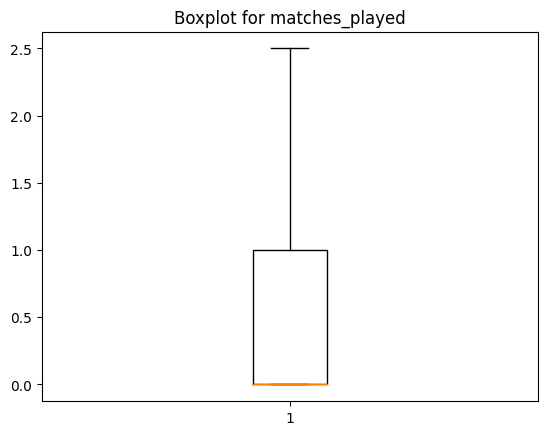

Feature: fitness_rating
  Q1: 5.7
  Q3: 7.5
  IQR: 1.7999999999999998
  Lower limit: 3.0000000000000004
  Upper limit: 10.2
  Outliers: [2.1, 1.9, 2.6, 2.3, 1.5, 1.5, 2.4, 2.1, 2.4, 2.8, 3.0, 2.3, 1.5, 2.9, 2.5, 2.1, 2.0, 1.4, 2.0, 2.4, 2.1, 2.9, 1.6, 1.9, 2.6, 2.1, 2.9, 2.7, 3.0, 2.9, 1.9, 2.8, 1.6, 2.8, 2.0, 3.0, 2.4, 2.7, 2.9, 2.9, 2.3, 1.8, 1.9, 2.9, 3.0, 3.0, 1.3, 2.4, 2.8, 1.9, 2.4, 2.4, 2.9, 2.9, 2.0, 2.2, 2.9, 2.3, 2.4, 2.3, 2.7, 3.0, 2.0, 2.2, 2.7, 2.3, 2.8, 1.5, 2.0, 2.4, 2.5, 1.6, 2.8, 2.1, 3.0, 2.1, 1.6, 2.0, 2.7, 2.8, 2.2, 1.9, 2.3, 3.0, 2.4, 2.5, 1.9, 2.5, 3.0, 3.0, 2.7, 2.4, 2.1, 3.0, 2.0, 2.6, 2.3, 2.2, 2.0, 1.9, 1.8, 2.7, 2.0, 2.1, 1.8, 1.4, 2.4, 1.9, 3.0, 2.8, 2.7, 2.9, 2.5, 2.7, 3.0, 3.0, 2.3, 1.4, 1.5, 2.9, 2.7, 3.0, 2.4, 2.3, 2.1, 2.7, 1.5, 1.6, 2.9, 1.4, 2.3, 2.8, 2.9, 2.5, 2.7, 1.4, 1.9, 2.8, 1.5, 1.6, 2.7, 2.2, 1.5, 2.9, 1.4, 1.6, 2.1, 2.4, 2.4, 1.4, 2.8, 1.5, 2.0, 2.5, 2.1, 1.6, 2.8, 2.9, 2.6, 2.3, 2.5, 1.4, 2.4, 2.9, 3.0, 2.4, 2.5, 1.8, 1.8, 2.0, 2.0, 2.3, 1.9

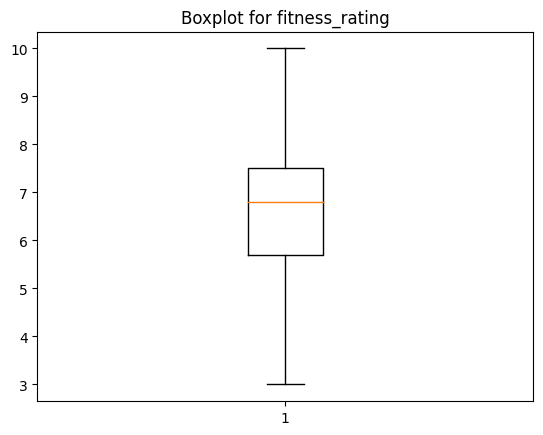

Feature: years_of_experience
  Q1: 2.0
  Q3: 10.0
  IQR: 8.0
  Lower limit: -10.0
  Upper limit: 22.0
  Outliers: [25.0, 25.0, 24.0, 26.0]


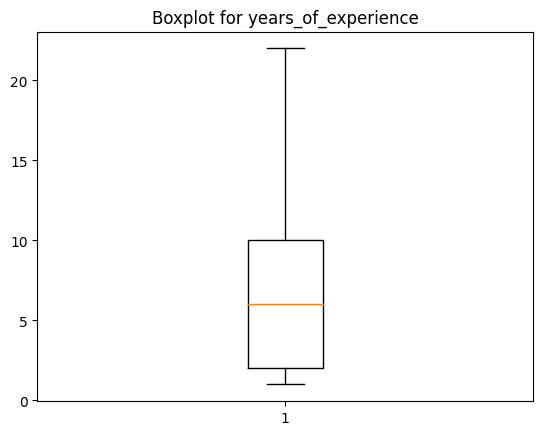

Feature: no_of_disqualifications
  Q1: 0.0
  Q3: 0.0
  IQR: 0.0
  Lower limit: 0.0
  Upper limit: 0.0
  Outliers: [16.0, 4.0, 6.0, 5.0, 8.0, 5.0, 6.0, -999.0, 4.0, 4.0, 5.0, 4.0, 6.0, 4.0, 6.0, 5.0, 5.0, 4.0, 6.0, 4.0, 6.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 5.0, 8.0, 5.0, 5.0, 4.0, 6.0, 4.0, 5.0, 4.0, 6.0, -999.0, 5.0, 8.0, 4.0, 5.0, 5.0, 4.0, 9.0, 5.0, 12.0, 8.0, 5.0, 5.0, 12.0, 8.0, 12.0, 6.0, 4.0, 12.0, 18.0, 5.0, 10.0, 4.0, 4.0, -999.0, 4.0, 5.0, 10.0, 18.0, 4.0, 9.0, 4.0, 4.0, 9.0, 5.0, 8.0, 4.0, 12.0, 4.0, 12.0, 4.0, 6.0, -999.0, 8.0, 9.0, 5.0, 4.0, 6.0, 6.0, -999.0, 4.0, -999.0, 4.0, 8.0, 4.0, 6.0, 4.0, 10.0, 8.0, 4.0, 9.0, 5.0, 9.0, 4.0, 6.0, 4.0, 5.0, 10.0, 12.0, 6.0, 4.0, 4.0, 6.0, 4.0, 6.0, 10.0, -999.0, 6.0, 4.0, 5.0, -999.0, 5.0, 9.0, 4.0, 6.0, 4.0, 8.0, 4.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 12.0, 6.0, 6.0, -999.0, 4.0, 4.0, 6.0, 6.0, 5.0, 9.0, 5.0, 4.0, 5.0, 4.0, 12.0, 10.0, 5.0, 12.0, 5.0, 4.0, 5.0, 12.0, 4.0, 5.0, 4.0, 4.0, 12.0, 4.0, 4.0, 6.0, 4.0, 4.0, 10.0, 9.0, 6.0, -

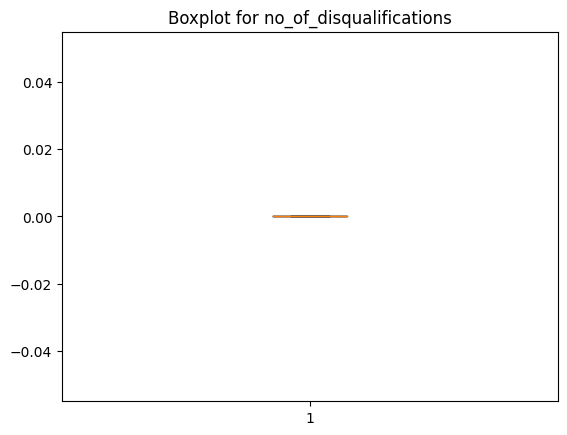

In [67]:
# Function to detect and cap outliers for a given feature
def handle_outliers(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5 * iqr
    upp_lim = q3 + 1.5 * iqr

    outliers = df[feature][(df[feature] < low_lim) | (df[feature] > upp_lim)]
    df[feature] = df[feature].clip(lower=low_lim, upper=upp_lim)

    return outliers, low_lim, upp_lim

# Iterate over each feature to handle outliers
for feature in features:
    outliers, low_lim, upp_lim = handle_outliers(data, feature)
    print(f'Feature: {feature}')
    print(f'  Q1: {data[feature].quantile(0.25)}')
    print(f'  Q3: {data[feature].quantile(0.75)}')
    print(f'  IQR: {data[feature].quantile(0.75) - data[feature].quantile(0.25)}')
    print(f'  Lower limit: {low_lim}')
    print(f'  Upper limit: {upp_lim}')
    print(f'  Outliers: {outliers.tolist()}')

    # Plotting the boxplot for each feature
    plt.figure()
    plt.boxplot(data[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()

In [68]:
outliers_cols=['age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes',
       'body_balance', 'jumping_skills', 'penalties_conversion_rate',
       'mental_strength', 'goalkeeping_skills',
       'passing_skills', 'dribbling_skills', 'shot_accuracy',
       'body_strength_stamina', 'max_running_speed', 'behaviour_rating',
       'matches_played', 'fitness_rating',
       'years_of_experience', 'no_of_disqualifications']

In [69]:
#drop unnecessary columns
data.drop(['name','player_id'],axis=1,inplace=True)

In [70]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the Pearson correlation matrix
corr = numeric_data.corr(method="pearson")

# Display the correlation matrix
corr

,age,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
age,1.000000,0.054183,0.198614,0.113260,-0.015167,-0.071296,0.161322,0.140421,0.364574,0.137300,...,0.165443,0.226492,-0.168182,0.418902,0.212071,0.083808,0.042927,0.957839,NaN,-0.183747
height,0.054183,1.000000,0.736601,-0.389230,-0.601348,-0.767780,-0.062280,-0.335765,-0.146078,0.265592,...,-0.348770,0.096757,-0.499426,-0.019336,0.043535,-0.259404,-0.130328,0.058741,NaN,0.003177
weight,0.198614,0.736601,1.000000,-0.316611,-0.521443,-0.652833,0.009518,-0.249769,-0.057083,0.261147,...,-0.256245,0.184918,-0.445531,0.072562,0.078907,-0.203064,-0.099971,0.203757,NaN,-0.013354
ball_controlling_skills,0.113260,-0.389230,-0.316611,1.000000,0.681395,0.570379,0.171765,0.741567,0.700018,-0.462223,...,0.857944,0.501304,0.630973,0.482627,0.187574,0.641219,0.273373,0.113858,NaN,0.294775
body_reflexes,-0.015167,-0.601348,-0.521443,0.681395,1.000000,0.760605,0.219753,0.561594,0.445828,-0.373533,...,0.641137,0.266770,0.795433,0.272685,0.056970,0.538791,0.236157,-0.020736,NaN,0.162585
body_balance,-0.071296,-0.767780,-0.652833,0.570379,0.760605,1.000000,0.189871,0.482936,0.331187,-0.372744,...,0.527215,0.118413,0.681969,0.151442,0.024056,0.447560,0.197665,-0.076157,NaN,0.101106
jumping_skills,0.161322,-0.062280,0.009518,0.171765,0.219753,0.189871,1.000000,0.133975,0.264295,-0.125001,...,0.181643,0.405254,0.228398,0.260000,0.098014,0.346108,0.055974,0.158960,NaN,0.085076
penalties_conversion_rate,0.140421,-0.335765,-0.249769,0.741567,0.561594,0.482936,0.133975,1.000000,0.566585,-0.420426,...,0.854035,0.389084,0.531928,0.343003,0.164622,0.484573,0.247980,0.141791,NaN,0.177077
mental_strength,0.364574,-0.146078,-0.057083,0.700018,0.445828,0.331187,0.264295,0.566585,1.000000,-0.262719,...,0.669684,0.527050,0.366094,0.652236,0.287647,0.519169,0.227647,0.371848,NaN,0.320597
goalkeeping_skills,0.137300,0.265592,0.261147,-0.462223,-0.373533,-0.372744,-0.125001,-0.420426,-0.262719,1.000000,...,-0.463613,-0.344037,-0.449788,-0.020271,-0.003423,-0.436250,-0.124998,0.139298,NaN,-0.069387


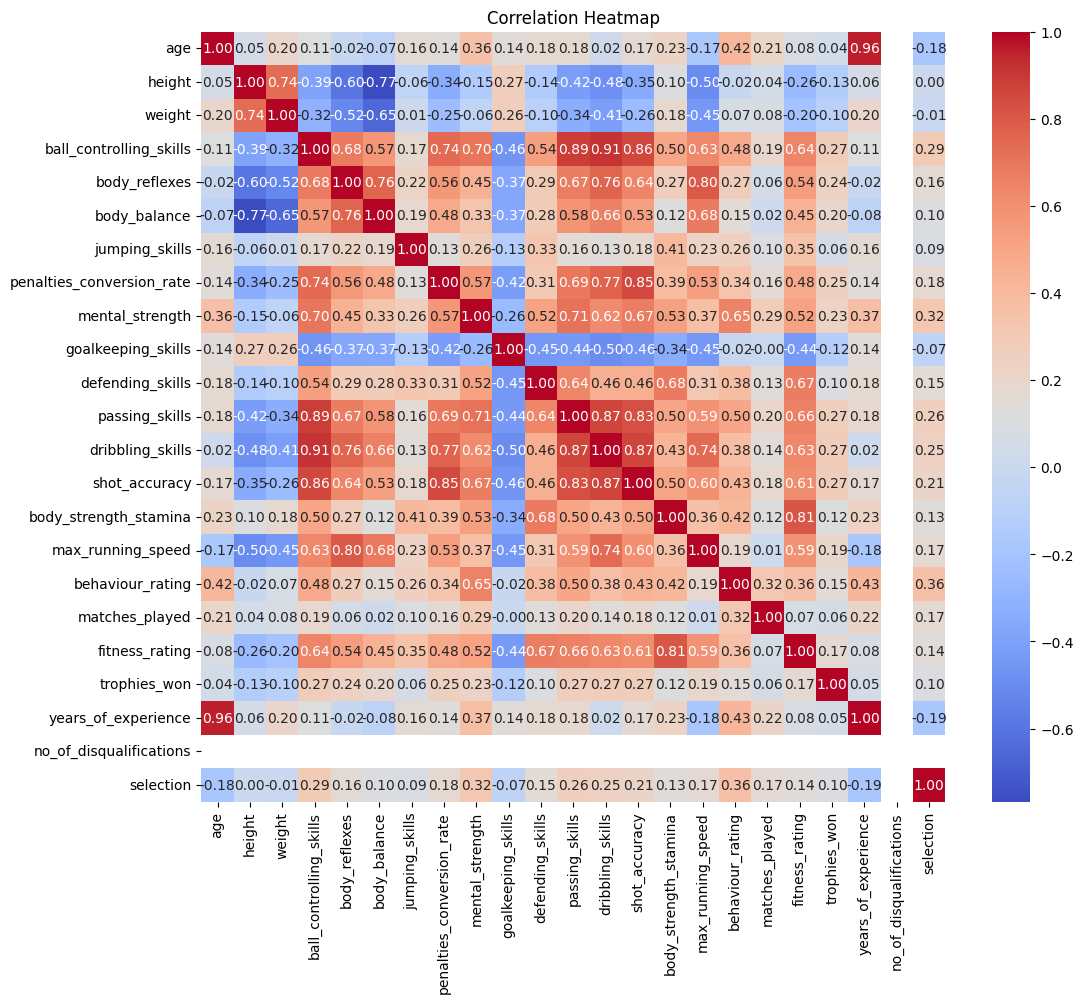

In [71]:
# Set the size of the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Set the title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [72]:
col_obj=data.select_dtypes(include='object').columns
col_obj

Index(['gender', 'country', 'strong_foot', 'dedication_level', 'coaching'], dtype='object')

In [73]:
#find unique values for these columns

In [74]:
data['dedication_level'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [75]:
data['strong_foot'].unique()

array(['Right', 'Any', 'Left'], dtype=object)

In [76]:
data['coaching'].unique()

array(['Talent Hunt', 'Source', 'Academy', 'Unknown'], dtype=object)

In [77]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [78]:
data['country'].unique()

array(['Ukraine', 'Russia', 'Spain', 'Chile', 'Argentina', 'Guinea',
       'China PR', 'United States', 'Italy', 'Belgium', 'Germany',
       'England', 'Colombia', 'Brazil', 'France', 'Netherlands',
       'Afghanistan', 'Sweden', 'Switzerland', 'Ghana', 'Poland',
       'Iceland', 'Bulgaria', 'Mexico', 'Northern Ireland', 'Uruguay',
       'Ivory Coast', 'Portugal', 'New Zealand', 'Norway',
       'Korea Republic', 'Scotland', 'Greece', 'Denmark', 'Slovakia',
       'Japan', 'Togo', 'Slovenia', 'Finland', 'Australia', 'Paraguay',
       'Republic of Ireland', 'Croatia', 'Saudi Arabia', 'Wales',
       'Czech Republic', 'Austria', 'Georgia', 'Gabon', 'Turkey',
       'Madagascar', 'Serbia', 'Congo', 'Tunisia', 'Canada', 'Senegal',
       'Thailand', 'Kosovo', 'Israel', 'Montserrat', 'Guatemala',
       'Algeria', 'Iraq', 'South Africa', 'Albania', 'Hungary',
       'Honduras', 'Morocco', 'Romania', 'Mali', 'Bosnia Herzegovina',
       'Ecuador', 'DR Congo', 'Burkina Faso', 'Peru', 'K

In [79]:
# use onehot encoder for 'gender', 'strong_foot', 'dedication_level', 'coaching'

In [80]:
from sklearn.preprocessing import OneHotEncoder
# Columns to encode
columns_to_encode = ['gender', 'strong_foot', 'dedication_level', 'coaching']

# One-hot encode specified columns
encoder = OneHotEncoder(sparse=False, drop='first')  # Set drop='first' to avoid multicollinearity
encoded_data = encoder.fit_transform(data[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Drop original columns and concatenate one-hot encoded columns
data = data.drop(columns=columns_to_encode)
data_encoded = pd.concat([data, encoded_df], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
# use binary encoder for country

In [82]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [83]:
import category_encoders as ce

# Initialize the binary encoder
encoder = ce.BinaryEncoder(cols=['country'])

# Apply binary encoding to the 'country' column
data_encoded = encoder.fit_transform(data)



In [86]:
# Verify the encoding
data_encoded.head()

,age,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,height,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
0,23.0,0,0,0,0,0,0,0,1,74,...,50.0,72.0,24.4,7.7,0.0,8.1,2.0,8.0,0.0,1
1,18.0,0,0,0,0,0,0,1,0,70,...,53.0,54.0,22.6,5.3,0.0,6.8,3.0,3.0,0.0,0
2,16.0,0,0,0,0,0,0,1,1,74,...,50.0,66.0,23.2,4.7,0.0,6.6,5.0,2.0,0.0,1
3,27.0,0,0,0,0,0,1,0,0,71,...,79.0,78.0,21.2,8.6,2.5,8.6,6.0,13.0,0.0,1
4,19.0,0,0,0,0,0,1,0,1,68,...,35.0,56.0,23.4,5.9,0.0,5.7,5.0,4.0,0.0,0


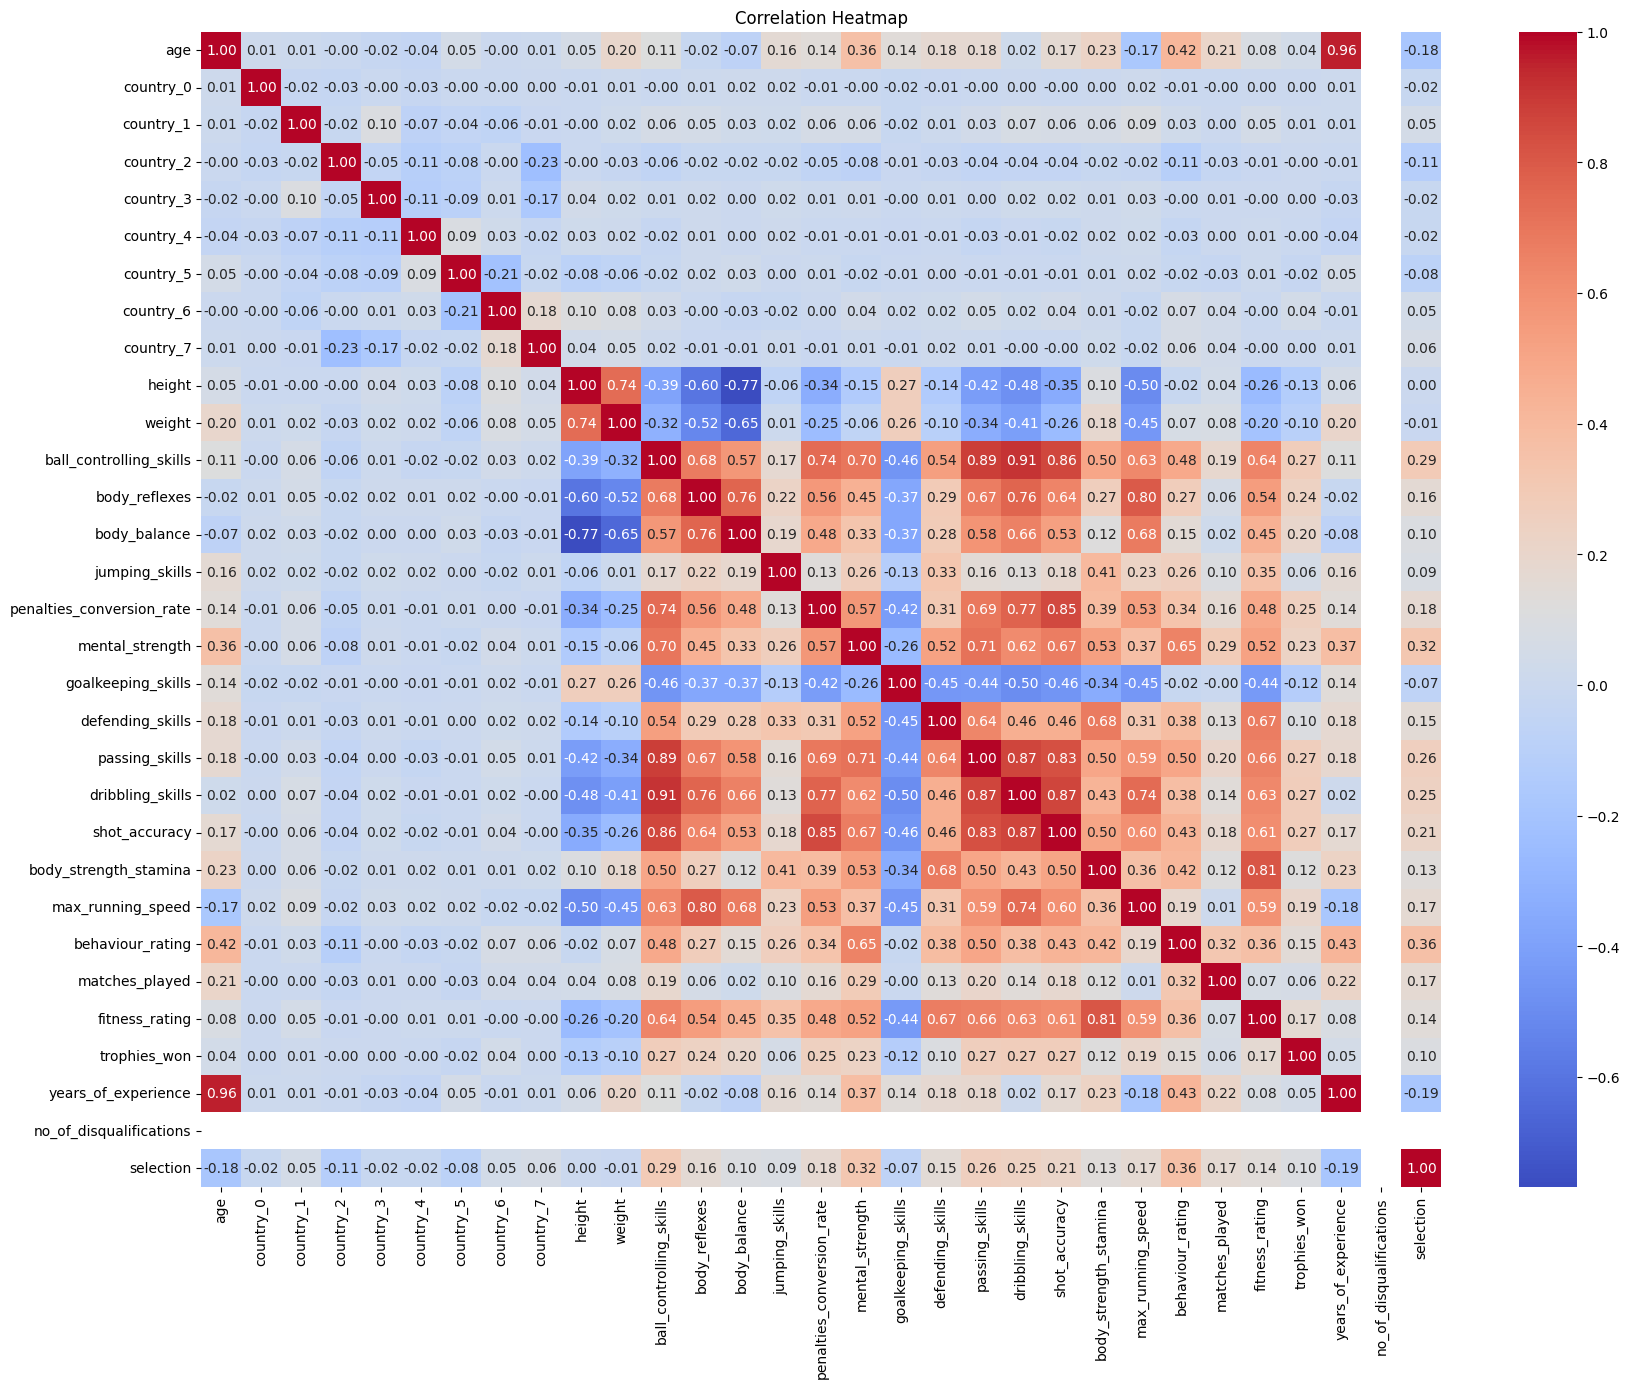

In [85]:
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [88]:
data_encoded['selection'].value_counts()

selection
1    7802
0    6192
Name: count, dtype: int64

In [89]:
#splitting target variable
y=data_encoded[['selection']]
X=data_encoded.drop(['selection'],axis=1)

In [90]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(11195, 30) (2799, 30) (11195, 1) (2799, 1)


In [92]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [93]:
from sklearn.metrics import confusion_matrix , accuracy_score

**KNN** **CLASSIFIER**

In [94]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[0.7031082529474812,
 0.6941764916041443,
 0.729188996070025,
 0.7277599142550911,
 0.7384780278670954,
 0.7427652733118971,
 0.7488388710253662,
 0.7427652733118971,
 0.7502679528403001,
 0.7538406573776348,
 0.7559842801000357,
 0.7606287959985709,
 0.765987852804573,
 0.7631296891747053]

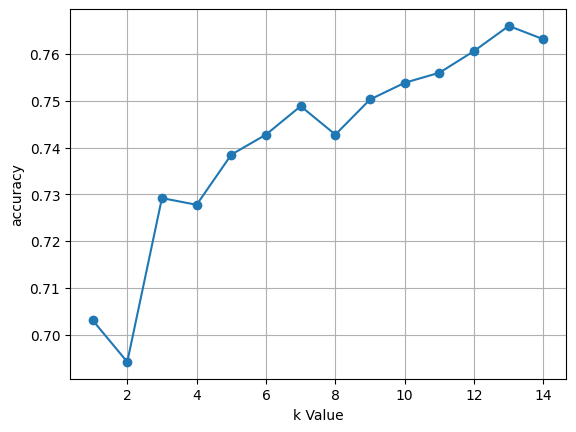

In [95]:
#plotting k vs accuracy to know which k gives maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [96]:
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [97]:
#Confusion matrix for kNN
print('Confusion Matrix :\n ',confusion_matrix(y_test,y_pred_knn))

Confusion Matrix :
  [[ 923  363]
 [ 292 1221]]


In [98]:
#Evaluation metrices
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))


KNN Accuracy is 0.765987852804573


In [102]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

In [103]:
# List of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [104]:
# Evaluate each classifier
for name, clf in classifiers.items():
    # Cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Test Accuracy: {accuracy:.4f}")

    # Print classification report
    print(classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")

Logistic Regression - Cross-Validation Accuracy: 0.7647 (+/- 0.0050)
Logistic Regression - Test Accuracy: 0.7660
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1286
           1       0.76      0.82      0.79      1513

    accuracy                           0.77      2799
   macro avg       0.77      0.76      0.76      2799
weighted avg       0.77      0.77      0.76      2799



Decision Tree - Cross-Validation Accuracy: 0.7717 (+/- 0.0065)
Decision Tree - Test Accuracy: 0.7706
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1286
           1       0.78      0.80      0.79      1513

    accuracy                           0.77      2799
   macro avg       0.77      0.77      0.77      2799
weighted avg       0.77      0.77      0.77      2799



Random Forest - Cross-Validation Accuracy: 0.8422 (+/- 0.0033)
Random Forest - Test Accuracy: 0.8403
              precision    

In [ ]:
#max accuracy for xg boost


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Best estimator
best_estimator = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
